# Identifying features that influence low-income student success

by Ben Lacar
<br>
March 2019

This notebook will be for **feature confirmation**


- Use the interactive dataframe extension (qgrid?)

In [1]:
# Import packages

import os

# Dataframe munging and statistics
import re
import pandas as pd
import numpy as np

import qgrid

# Data visualization
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
# Colors and formatting
# Got Google theme html colors from here https://imagecolorpicker.com
B_beige = "#CDA577"
B_brown = "#643E34"
B_slate = "#3F5B66"
B_dkgray = "#5A7E8E"
B_ltgray = "#6D949B"
B_green = "#01CB8B"
B_lime = "#D3F04A"

B_colors = [B_beige, B_brown, B_slate, B_dkgray, B_ltgray, B_green, B_lime]
B_colors_cat = [B_beige, B_green, B_brown, B_ltgray, B_slate, B_lime, B_dkgray]

# Code formatting Jupyter black
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
parent_path = "/Users/lacar/Documents/Data_science/Jupyter_notebooks/Education_study/"
os.chdir(parent_path)
os.getcwd()

'/Users/lacar/Documents/Data_science/Jupyter_notebooks/Education_study'

<IPython.core.display.Javascript object>

## Import data

In [5]:
# From 1-data-collection notebook
df_state_info_gs_census = pd.read_csv(
    "data/b_intermediate/df_state_info_gs_nces_census_enrollment_200428.csv", index_col=0
)

<IPython.core.display.Javascript object>

In [9]:
## qgrid widget
qgrid_widget = qgrid.show_grid(
    df_state_info_gs_census.iloc[:, 0:10], show_toolbar=True
)
# qgrid_widget

<IPython.core.display.Javascript object>

In [10]:
[print(i) for i in df_state_info_gs_census.columns]

NCESDist
NCESSchool
StatusType
County
District
School
Street
StreetAbr
City
Zip
State
MailStreet
MailStrAbr
MailCity
MailZip
MailState
Phone
Ext
WebSite
OpenDate
ClosedDate
Charter
CharterNum
FundingType
DOC
DOCType
SOC
SOCType
EdOpsCode
EdOpsName
EILCode
EILName
GSoffered
GSserved
Virtual
Magnet
YearRoundYN
FederalDFCDistrictID
Latitude
Longitude
AdmFName1
AdmLName1
AdmEmail1
AdmFName2
AdmLName2
AdmEmail2
AdmFName3
AdmLName3
AdmEmail3
LastUpDate
zip_code
NCESDistSchool
E9
E10
E11
E12
ETOT
D9
D10
D11
D12
DTOT
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
9_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
9_y
%_enrolled_of_total_Not reported
%_dropout_within_Not reported
%_enrolled_of_total_Native Amer/Alaska Native
%_dropout_within_Native Amer/Alaska Native
%_enrolled_of_total_Asian
%_dropout_within_Asian
%_enrolled_of_total_Pacific Islander
%_dropout_within_Pacific Islander
%_enrolled_of_total_Filipino
%_dropout_within_Filipino
%_enrolled_of_total_Hispanic
%_dropout_within_Hispanic
%_enrolled_of_total_African Ame

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

<IPython.core.display.Javascript object>

# Feature confirmation

In [11]:
sns.set_context(
    "talk", rc={"font.size": 12, "axes.titlesize": 14, "axes.labelsize": 10}
)

<IPython.core.display.Javascript object>

In [12]:
def scatter_plot_open_circles(df, feature_x, feature_y, ax):
    x = df[feature_x]
    y = df[feature_y]
    ax.scatter(x, y, facecolors="none", edgecolors=B_dkgray)
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)

<IPython.core.display.Javascript object>

In [13]:
def hist_plot(df, feature, ax):
    df[feature].hist(ax=ax, bins=30, color=B_slate)
    ax.set_title(feature)

<IPython.core.display.Javascript object>

## Filter for number enrolled, number in 12th grade

In [14]:
# Sanity check
df_state_info_gs_census.loc[
    df_state_info_gs_census["name"].str.contains("Bonita"),
    ["name", "enrollment", "E12"],
]

name  enrollment  E12
204               Bonita High School      1993.0  478
796  Bonita Vista Senior High School      2496.0  689

<IPython.core.display.Javascript object>

In [15]:
# Enrollment quantile cut
df_state_info_gs_census["enrollment"].quantile(np.arange(0, 1.05, 0.05))

0.00       1.00
0.05     105.00
0.10     214.00
0.15     324.05
0.20     428.80
0.25     525.00
0.30     615.10
0.35     839.00
0.40    1052.40
0.45    1208.30
0.50    1396.00
0.55    1580.85
0.60    1712.00
0.65    1832.55
0.70    1978.80
0.75    2098.25
0.80    2240.60
0.85    2409.90
0.90    2611.50
0.95    2906.75
1.00    8000.00
Name: enrollment, dtype: float64

<IPython.core.display.Javascript object>

In [16]:
# E12 quantile cut
df_state_info_gs_census["E12"].quantile(np.arange(0, 1.05, 0.05))

0.00       0.00
0.05      14.00
0.10      38.00
0.15      67.00
0.20      91.80
0.25     117.00
0.30     145.40
0.35     190.15
0.40     237.00
0.45     276.10
0.50     314.50
0.55     349.00
0.60     389.00
0.65     421.85
0.70     452.30
0.75     485.00
0.80     525.00
0.85     559.65
0.90     611.00
0.95     688.55
1.00    1182.00
Name: E12, dtype: float64

<IPython.core.display.Javascript object>

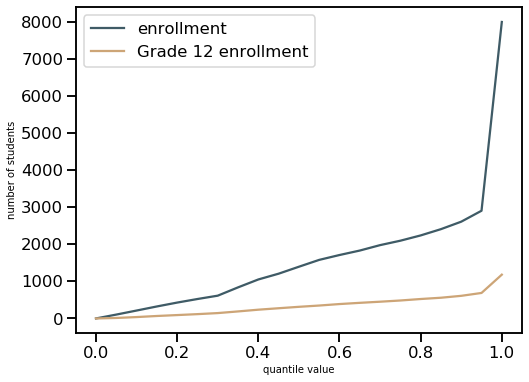

<IPython.core.display.Javascript object>

In [17]:
f, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(
    df_state_info_gs_census["enrollment"].quantile(np.arange(0, 1.05, 0.05)),
    color=B_slate,
    label="enrollment",
)
ax1.plot(
    df_state_info_gs_census["E12"].quantile(np.arange(0, 1.05, 0.05)),
    color=B_beige,
    label="Grade 12 enrollment",
)
ax1.set_ylabel("number of students")
ax1.set_xlabel("quantile value")
ax1.legend()

**I will look at schools with at least 25 students enrolled in 12th grade**

In [18]:
print(
    "No. of schools BEFORE filter of >= 25 students enrolled in 12th grade: {0:d}".format(
        df_state_info_gs_census.shape[0]
    )
)

No. of schools BEFORE filter of >= 25 students enrolled in 12th grade: 1110


<IPython.core.display.Javascript object>

In [19]:
df_state_info_gs_census = df_state_info_gs_census[
    df_state_info_gs_census["E12"] >= 25
].copy()

<IPython.core.display.Javascript object>

In [20]:
print(
    "No. of schools AFTER filter of >= 25 students enrolled in 12th grade: {0:d}".format(
        df_state_info_gs_census.shape[0]
    )
)

No. of schools AFTER filter of >= 25 students enrolled in 12th grade: 1031


<IPython.core.display.Javascript object>

## Feature engineering and categories

**Generate a non low income college eligibility percentage**

Given:
- pct low income students
- pct of all students college eligible
- pct of low income that are college eligible (SPLICE)
- enrollment, including grade 12

Get:
- pct non low income students  = 100 - (pct_LI_students)
- number graduated from E12

In [21]:
df_state_info_gs_census[
    [
        "School",
        "enrollment",
        "ETOT",
        "E12",
        "pct_LI_students",
        "graduation_rates_UCCSU_eligibility_LIstudents",
        "graduation_rates_UCCSU_eligibility_allStudents",
    ]
].head()

School  enrollment  ETOT  E12  \
0  Envision Academy for Arts & Technology       407.0   407   88   
1                            Alameda High      1853.0  1718  381   
2                  Alternatives in Action       165.0   165   31   
3       Lighthouse Community Charter High       214.0   260   59   
4                             Albany High      1210.0  1210  285   

   pct_LI_students  graduation_rates_UCCSU_eligibility_LIstudents  \
0             67.0                                          100.0   
1             18.0                                           50.0   
2              NaN                                          100.0   
3             80.0                                          100.0   
4             17.0                                           45.0   

   graduation_rates_UCCSU_eligibility_allStudents  
0                                           100.0  
1                                            66.0  
2                                           100.0  
3                                           100.0  
4                                            63.0

<IPython.core.display.Javascript object>

In [22]:
# Have a non low income college eligibility

# Given pct low income students
df_state_info_gs_census["pct_nonLI_students"] = (
    100 - df_state_info_gs_census["pct_LI_students"]
)
df_state_info_gs_census["est_LI_grade12_students"] = (
    df_state_info_gs_census["E12"] * 0.01 * df_state_info_gs_census["pct_LI_students"]
)
df_state_info_gs_census["est_nonLI_grade12_students"] = (
    df_state_info_gs_census["E12"]
    * 0.01
    * df_state_info_gs_census["pct_nonLI_students"]
)

df_state_info_gs_census["est_UCCSU_eligible_all"] = (
    df_state_info_gs_census["E12"]
    * 0.01
    * df_state_info_gs_census["graduation_rates_UCCSU_eligibility_allStudents"]
)
df_state_info_gs_census["est_UCCSU_eligible_LI"] = (
    df_state_info_gs_census["est_LI_grade12_students"]
    * 0.01
    * df_state_info_gs_census["graduation_rates_UCCSU_eligibility_LIstudents"]
)
df_state_info_gs_census["est_UCCSU_eligible_nonLI"] = (
    df_state_info_gs_census["est_UCCSU_eligible_all"]
    - df_state_info_gs_census["est_UCCSU_eligible_LI"]
)
df_state_info_gs_census["graduation_rates_UCCSU_eligibility_nonLIstudents"] = 100 * (
    df_state_info_gs_census["est_UCCSU_eligible_nonLI"]
    / df_state_info_gs_census["est_nonLI_grade12_students"]
)

df_state_info_gs_census["nonLI-LI_UCCSU_eligibility_gap"] = (
    df_state_info_gs_census["graduation_rates_UCCSU_eligibility_nonLIstudents"]
    - df_state_info_gs_census["graduation_rates_UCCSU_eligibility_LIstudents"]
)

<IPython.core.display.Javascript object>

In [23]:
df_state_info_gs_census[
    [
        "School",
        "enrollment",
        "ETOT",
        "E12",
        "est_LI_grade12_students",
        "pct_LI_students",
        "pct_nonLI_students",
        "graduation_rates_UCCSU_eligibility_LIstudents",
        "graduation_rates_UCCSU_eligibility_nonLIstudents",
        "graduation_rates_UCCSU_eligibility_allStudents",
        "nonLI-LI_UCCSU_eligibility_gap",
    ]
].head()

School  enrollment  ETOT  E12  \
0  Envision Academy for Arts & Technology       407.0   407   88   
1                            Alameda High      1853.0  1718  381   
2                  Alternatives in Action       165.0   165   31   
3       Lighthouse Community Charter High       214.0   260   59   
4                             Albany High      1210.0  1210  285   

   est_LI_grade12_students  pct_LI_students  pct_nonLI_students  \
0                    58.96             67.0                33.0   
1                    68.58             18.0                82.0   
2                      NaN              NaN                 NaN   
3                    47.20             80.0                20.0   
4                    48.45             17.0                83.0   

   graduation_rates_UCCSU_eligibility_LIstudents  \
0                                          100.0   
1                                           50.0   
2                                          100.0   
3                                          100.0   
4                                           45.0   

   graduation_rates_UCCSU_eligibility_nonLIstudents  \
0                                        100.000000   
1                                         69.512195   
2                                               NaN   
3                                        100.000000   
4                                         66.686747   

   graduation_rates_UCCSU_eligibility_allStudents  \
0                                           100.0   
1                                            66.0   
2                                           100.0   
3                                           100.0   
4                                            63.0   

   nonLI-LI_UCCSU_eligibility_gap  
0                    0.000000e+00  
1                    1.951220e+01  
2                             NaN  
3                    4.263256e-14  
4                    2.168675e+01

<IPython.core.display.Javascript object>

### Filter for number of low income students in 12th grade

In [24]:
df_state_info_gs_census["est_LI_grade12_students"].quantile(np.arange(0, 1.1, 0.1))

0.0       2.75
0.1      36.00
0.2      61.42
0.3      88.26
0.4     113.56
0.5     149.04
0.6     195.72
0.7     252.49
0.8     307.80
0.9     384.67
1.0    1010.10
Name: est_LI_grade12_students, dtype: float64

<IPython.core.display.Javascript object>

Text(0.5, 0, 'quantile value')

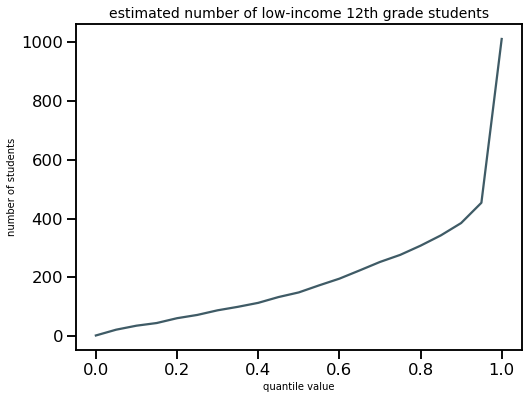

<IPython.core.display.Javascript object>

In [25]:
f, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(
    df_state_info_gs_census["est_LI_grade12_students"].quantile(
        np.arange(0, 1.05, 0.05)
    ),
    color=B_slate,
    label="enrollment",
)

ax1.set_title("estimated number of low-income 12th grade students")
ax1.set_ylabel("number of students")
ax1.set_xlabel("quantile value")

**I will filter for schools with an estimated number of at least 10 low income students in the 12th grade.**

In [26]:
df_state_info_gs_census = df_state_info_gs_census[
    df_state_info_gs_census["est_LI_grade12_students"] >= 10
].copy()

<IPython.core.display.Javascript object>

In [27]:
print(
    "No. of schools AFTER filter of >= 10 low income students enrolled in 12th grade: {0:d}".format(
        df_state_info_gs_census.shape[0]
    )
)

No. of schools AFTER filter of >= 10 low income students enrolled in 12th grade: 966


<IPython.core.display.Javascript object>

### Category-specific features

In [28]:
# Replace magnet and charter status with category encoding variables
df_state_info_gs_census["Magnet_cat_encoded"] = df_state_info_gs_census[
    "Magnet"
].replace({"No Data": None, "N": 0, "Y": 1})
df_state_info_gs_census["Charter_cat_encoded"] = df_state_info_gs_census[
    "Charter"
].replace({"No Data": None, "N": 0, "Y": 1})

<IPython.core.display.Javascript object>

In [29]:
[i for i in df_state_info_gs_census.columns.tolist()]

['NCESDist',
 'NCESSchool',
 'StatusType',
 'County',
 'District',
 'School',
 'Street',
 'StreetAbr',
 'City',
 'Zip',
 'State',
 'MailStreet',
 'MailStrAbr',
 'MailCity',
 'MailZip',
 'MailState',
 'Phone',
 'Ext',
 'WebSite',
 'OpenDate',
 'ClosedDate',
 'Charter',
 'CharterNum',
 'FundingType',
 'DOC',
 'DOCType',
 'SOC',
 'SOCType',
 'EdOpsCode',
 'EdOpsName',
 'EILCode',
 'EILName',
 'GSoffered',
 'GSserved',
 'Virtual',
 'Magnet',
 'YearRoundYN',
 'FederalDFCDistrictID',
 'Latitude',
 'Longitude',
 'AdmFName1',
 'AdmLName1',
 'AdmEmail1',
 'AdmFName2',
 'AdmLName2',
 'AdmEmail2',
 'AdmFName3',
 'AdmLName3',
 'AdmEmail3',
 'LastUpDate',
 'zip_code',
 'NCESDistSchool',
 'E9',
 'E10',
 'E11',
 'E12',
 'ETOT',
 'D9',
 'D10',
 'D11',
 'D12',
 'DTOT',
 '0_x',
 '1_x',
 '2_x',
 '3_x',
 '4_x',
 '5_x',
 '6_x',
 '7_x',
 '9_x',
 '0_y',
 '1_y',
 '2_y',
 '3_y',
 '4_y',
 '5_y',
 '6_y',
 '7_y',
 '9_y',
 '%_enrolled_of_total_Not reported',
 '%_dropout_within_Not reported',
 '%_enrolled_of_total_

<IPython.core.display.Javascript object>

In [30]:
# Percent ethnicity enrollment
col_pct_ethnicity = [
    i for i in df_state_info_gs_census.columns.tolist() if "%_enroll" in i
]

# Won't look at dropout columns but will get for census exclusion
col_pct_dropout = [
    i
    for i in df_state_info_gs_census.columns.tolist()
    if ("%" in i) and ("dropout") in i
]

col_pct_ethnicity

['%_enrolled_of_total_Not reported',
 '%_enrolled_of_total_Native Amer/Alaska Native',
 '%_enrolled_of_total_Asian',
 '%_enrolled_of_total_Pacific Islander',
 '%_enrolled_of_total_Filipino',
 '%_enrolled_of_total_Hispanic',
 '%_enrolled_of_total_African American',
 '%_enrolled_of_total_White',
 '%_enrolled_of_total_Two or More Races']

<IPython.core.display.Javascript object>

In [31]:
# School info columns
col_school_info_magnet_charter = ["Magnet_cat_encoded", "Charter_cat_encoded"]
col_school_info_magnet_charter

['Magnet_cat_encoded', 'Charter_cat_encoded']

<IPython.core.display.Javascript object>

In [32]:
# Census columns that start with '%'
col_census_pct = list(
    set(
        df_state_info_gs_census.columns[
            df_state_info_gs_census.columns.str.startswith("%")
        ]
    )
    - set(col_pct_ethnicity + col_pct_dropout)
)

col_census_pct.sort()

# Broad categories in pct census columns
print(set([i.split("-")[0] for i in col_census_pct]))

{'%; HEALTH_INS_COVERAGE ', '%; EMPLOY_STATUS ', '%; WORKER_CLASS ', '%; INDUSTRY ', '%; INCOME_BENEFITS ', '%; WORK_COMMUTE ', '%; %', '%; OCCUPATION '}


<IPython.core.display.Javascript object>

In [33]:
# Census income columns (starts with 'Est')
col_census_est = df_state_info_gs_census.columns[
    df_state_info_gs_census.columns.str.startswith("Est")
]
# Change so that all are numeric/float, using apply
df_state_info_gs_census[col_census_est] = (
    df_state_info_gs_census[col_census_est]
    .apply(pd.to_numeric, errors="coerce")
    .dropna()
    .astype("float")
)
col_census_est.tolist()

['Est.; INCOME_BENEFITS - Total households - Median household income ($)',
 'Est.; INCOME_BENEFITS - Total households - Mean household income ($)',
 'Est.; INCOME_BENEFITS - w/ Social Security - Mean Social Security income ($)',
 'Est.; INCOME_BENEFITS - w/ retirement income',
 'Est.; INCOME_BENEFITS - w/ retirement income - Mean retirement income ($)',
 'Est.; INCOME_BENEFITS - w/ cash public assistance income',
 'Est.; INCOME_BENEFITS - w/ cash public assistance income - Mean cash public assistance income ($)',
 'Est.; INCOME_BENEFITS - Families - Median family income ($)',
 'Est.; INCOME_BENEFITS - Families - Mean family income ($)',
 'Est.; INCOME_BENEFITS - Per capita income ($)',
 'Est.; INCOME_BENEFITS - Nonfamily households - Median nonfamily income ($)',
 'Est.; INCOME_BENEFITS - Nonfamily households - Mean nonfamily income ($)']

<IPython.core.display.Javascript object>

In [34]:
# High level GS school rating columns
col_hl_ratings = [
    "college_readiness",
    "test_scores",
    "advanced_courses",
    "equity_overview",
    "race_ethnicity",
    "low_income",
    "disabilities",
]
col_gs_hl_ratings = ["gsRating"] + col_hl_ratings
# df_state_info_gs_census[col_gs_hl_ratings] = df_state_info_gs_census[col_gs_hl_ratings].apply(pd.to_numeric, errors='coerce').dropna().astype('float')
# Data types look like they're already float
# initial_analysis(df_state_info_gs_census[col_gs_hl_ratings])
col_gs_hl_ratings

['gsRating',
 'college_readiness',
 'test_scores',
 'advanced_courses',
 'equity_overview',
 'race_ethnicity',
 'low_income',
 'disabilities']

<IPython.core.display.Javascript object>

In [35]:
col_teacher_ratings = [
    "students_per_teacher",
    "students_per_counselor",
    "pct_teachers_3years_or_more",
    "pct_teachers_who_r_certified",
    "avg_teacher_salary",
]
col_teacher_ratings

['students_per_teacher',
 'students_per_counselor',
 'pct_teachers_3years_or_more',
 'pct_teachers_who_r_certified',
 'avg_teacher_salary']

<IPython.core.display.Javascript object>

In [36]:
col_lowincome_ratings = [
    "test_score_rating_allStudents",
    "test_score_rating_LIstudents",
    "test_score_rating_notLIstudents",
    "test_scores_english_allStudents",
    "test_scores_english_allStudents_n_students",
    "test_scores_english_LIstudents",
    "test_scores_english_LIstudents_n_students",
    "test_scores_math_allStudents",
    "test_scores_math_allStudents_n_students",
    "test_scores_math_LIstudents",
    "test_scores_math_LIstudents_n_students",
    "graduation_rates_UCCSU_eligibility_allStudents",
    "graduation_rates_UCCSU_eligibility_LIstudents",
    "graduation_rates_UCCSU_eligibility_nonLIstudents",
    "graduation_rates_gradRates_eligibility_allStudents",
    "graduation_rates_gradRates_eligibility_LIstudents",
    "pct_LI_students",
]

# Need to remove target from this list without altering original list
col_lowincome_ratings_notarget = col_lowincome_ratings[:]
col_lowincome_ratings_notarget.remove("graduation_rates_UCCSU_eligibility_LIstudents")
col_lowincome_ratings_notarget

['test_score_rating_allStudents',
 'test_score_rating_LIstudents',
 'test_score_rating_notLIstudents',
 'test_scores_english_allStudents',
 'test_scores_english_allStudents_n_students',
 'test_scores_english_LIstudents',
 'test_scores_english_LIstudents_n_students',
 'test_scores_math_allStudents',
 'test_scores_math_allStudents_n_students',
 'test_scores_math_LIstudents',
 'test_scores_math_LIstudents_n_students',
 'graduation_rates_UCCSU_eligibility_allStudents',
 'graduation_rates_UCCSU_eligibility_nonLIstudents',
 'graduation_rates_gradRates_eligibility_allStudents',
 'graduation_rates_gradRates_eligibility_LIstudents',
 'pct_LI_students']

<IPython.core.display.Javascript object>

## First pass feature filtering

In [37]:
all_features = (
    ["enrollment", "E12"]
    + col_pct_ethnicity
    + col_census_pct
    + col_census_est.tolist()
    + col_school_info_magnet_charter
    + col_gs_hl_ratings
    + col_teacher_ratings
    + col_lowincome_ratings_notarget
)

<IPython.core.display.Javascript object>

In [38]:
# Check for features that have been duplicated
# [i for i in col_census_pct.tolist() if ("_y" not in i)]
all_features = [i for i in all_features if ("_y" not in i)]
all_features

['enrollment',
 'E12',
 '%_enrolled_of_total_Not reported',
 '%_enrolled_of_total_Native Amer/Alaska Native',
 '%_enrolled_of_total_Asian',
 '%_enrolled_of_total_Pacific Islander',
 '%_enrolled_of_total_Filipino',
 '%_enrolled_of_total_Hispanic',
 '%_enrolled_of_total_African American',
 '%_enrolled_of_total_White',
 '%_enrolled_of_total_Two or More Races',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18 yrs and up',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18-64 yrs',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs and up',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs and up - People in families',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs and up - Unrelated individuals 15 yrs and up',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All families',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All families - w/ related children of the householder <18 yrs',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All people',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Married couple families',


<IPython.core.display.Javascript object>

In [39]:
all_features_filt = (
    df_state_info_gs_census[all_features]
    .dropna(thresh=0.67 * len(df_state_info_gs_census), axis=1)
    .columns.tolist()
)

<IPython.core.display.Javascript object>

In [40]:
print(
    "No. of features where at least 2/3 of the schools have values for a feature: \n",
    len(all_features_filt),
)

No. of features where at least 2/3 of the schools have values for a feature: 
 147


<IPython.core.display.Javascript object>

In [41]:
# Identify which features were removed
print(
    "Features that had too many missing values: ",
    set(all_features) - set(all_features_filt),
)

Features that had too many missing values:  {'advanced_courses', 'disabilities', 'race_ethnicity'}


<IPython.core.display.Javascript object>

## Check for normally distributed features

In [42]:
# Looking at Shapiro-Wilk test - this is like taking the slope of a Q-Q plot https://www.youtube.com/watch?v=dRAqSsgkCUc
from scipy.stats import shapiro

for col in df_state_info_gs_census[all_features_filt].columns:
    try:
        stat, p = shapiro(df_state_info_gs_census[col])
        if p > 0.05:
            print(stat, p, col)
    except:
        continue

nan 1.0 enrollment
nan 1.0 %; EMPLOY_STATUS - Own children of the householder under 6 yrs - All parents in family in labor force
nan 1.0 %; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. 18-64 yrs - In labor force: - Unemployed: - No health ins coverage
nan 1.0 %; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. 18-64 yrs - In labor force: - Unemployed: - w/ health ins coverage
nan 1.0 %; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. 18-64 yrs - In labor force: - Unemployed: - w/ health ins coverage - w/ private health insurance
nan 1.0 %; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. 18-64 yrs - In labor force: - Unemployed: - w/ health ins coverage - w/ public coverage
nan 1.0 Est.; INCOME_BENEFITS - Total households - Median household income ($)
nan 1.0 Est.; INCOME_BENEFITS - Total households - Mean household income ($)
nan 1.0 Est.; INCOME_BENEFITS - w/ Social Security - Mean Social Security income ($)
nan 1.0 Est.; INCOME_BENEFITS - w/ reti

<IPython.core.display.Javascript object>

In [43]:
len(all_features_filt)

147

<IPython.core.display.Javascript object>

# Checking features for linear models

I am considering applying linear models, with *inference* being a priority (understanding how my target is affected as the features change), several assumptions must be met.




## Evaluating for correlated features


From ISLR section [here](https://link.springer.com/chapter/10.1007/978-1-4614-7138-7_3#Sec14).
"Collinearity refers to the situation in which two or more predictor variables are closely related to one another...The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response.... Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat{\beta}_j$ to grow. Recall that the t-statistic for each predictor is calculated by dividing $\hat{\beta}_j$ by its standard error. Consequently, collinearity results in a decline in the t-statistic. As a result, in the presence of collinearity, we may fail to reject H0 : $\hat{\beta}_j$ = 0. This means that the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by collinearity."

### Evaluate VIF - Variance inflation factor
A rule of thumb is that VIF should be less than 5 or 10. This is a somewhat arbitrary cut-off and may be dependent on the task.

In [212]:
# Calculating VIF with scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [84]:
def filter_and_std_data(X, y):
    """
    Keep rows only if there are no null values for that feature and target.
    Then standardize data.
    """
    k_rows2keep = pd.merge(X, y, left_index=True, right_index=True).notnull().sum(
        axis=1
    ) == (X.shape[1] + 1)
    print(
        "No. of total schools before splitting (no null values for feature set or target): ",
        sum(k_rows2keep),
    )

    X = X.loc[k_rows2keep, :].copy()
    y = y[k_rows2keep].copy()
    
    data = pd.concat([X,y], axis=1)
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(data)
    data_scaled = (scaler.transform(data))
    
    return data_scaled[:, :-1], data_scaled[:, -1]

<IPython.core.display.Javascript object>

In [85]:
X_raw = df_state_info_gs_census[all_features_filt]
y_raw = df_state_info_gs_census['graduation_rates_UCCSU_eligibility_LIstudents']

<IPython.core.display.Javascript object>

In [86]:
X_raw.head()

enrollment  E12  %_enrolled_of_total_Not reported  \
0       407.0   88                          1.965602   
1      1853.0  381                          0.058207   
3       214.0   59                          0.000000   
4      1210.0  285                          0.082645   
5      3205.0  798                          0.000000   

   %_enrolled_of_total_Native Amer/Alaska Native  %_enrolled_of_total_Asian  \
0                                       1.228501                   1.719902   
1                                       0.174622                  40.337602   
3                                       0.000000                   2.307692   
4                                       0.247934                  28.595041   
5                                       0.353357                   8.576935   

   %_enrolled_of_total_Pacific Islander  %_enrolled_of_total_Filipino  \
0                              0.737101                      0.245700   
1                              0.756694                      5.296857   
3                              0.000000                      0.769231   
4                              0.330579                      1.735537   
5                              0.192740                      0.899454   

   %_enrolled_of_total_Hispanic  %_enrolled_of_total_African American  \
0                     51.351351                             38.329238   
1                     11.874272                              6.519208   
3                     83.846154                              8.461538   
4                     16.611570                              4.876033   
5                     21.426277                             18.503052   

   %_enrolled_of_total_White  ...  test_scores_english_LIstudents_n_students  \
0                   3.194103  ...                                       77.0   
1                  31.082654  ...                                      100.0   
3                   2.692308  ...                                       56.0   
4                  37.190083  ...                                       53.0   
5                  39.511725  ...                                      180.0   

   test_scores_math_allStudents  test_scores_math_allStudents_n_students  \
0                          20.0                                     96.0   
1                          58.0                                    401.0   
3                           NaN                                      NaN   
4                          63.0                                    274.0   
5                          54.0                                    571.0   

   test_scores_math_LIstudents  test_scores_math_LIstudents_n_students  \
0                         18.0                                    77.0   
1                         49.0                                   104.0   
3                          NaN                                     NaN   
4                         45.0                                    55.0   
5                         27.0                                   172.0   

   graduation_rates_UCCSU_eligibility_allStudents  \
0                                           100.0   
1                                            66.0   
3                                           100.0   
4                                            63.0   
5                                            66.0   

   graduation_rates_UCCSU_eligibility_nonLIstudents  \
0                                        100.000000   
1                                         69.512195   
3                                        100.000000   
4                                         66.686747   
5                                         72.222222   

   graduation_rates_gradRates_eligibility_allStudents  \
0                                               82.0    
1                                               95.0    
3                                               75.0    
4                                               93.0

<IPython.core.display.Javascript object>

In [87]:
X_filt, y_filt = filter_and_std_data(X_raw, y_raw)

No. of total schools before splitting (no null values for feature set or target):  811


<IPython.core.display.Javascript object>

In [94]:
# multiregression
X_filt_1 = sm.add_constant(X_filt)
lm = sm.OLS(endog=y_filt, exog=X_filt_1).fit()
variables = lm.model.exog

<IPython.core.display.Javascript object>

In [95]:
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

/Users/lacar/anaconda/envs/insight/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[1.0,
 58.99614761991811,
 37.9438528658006,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 1566.8418765867323,
 719.5739065388807,
 21.892130572393548,
 419.31312083355203,
 15.372449634007495,
 425.6059269033161,
 178.40466817295172,
 860.2974170924207,
 81.7946890724178,
 66.51717518815441,
 1954.8052809237026,
 1956.332398833698,
 89.97324939167308,
 142.58586528495547,
 891.8710065557201,
 940.2506531800078,
 86.91099144461282,
 3.1288439122259026,
 2.8977744628850046,
 inf,
 1682.842611847134,
 44071.824464945865,
 26147.901593173196,
 2377.0100077600205,
 inf,
 inf,
 inf,
 352.30536459225243,
 151.44213412069115,
 inf,
 inf,
 599.3980957982583,
 83.41943590343115,
 3747052.573718299,
 3749041.5264126575,
 96.06094985952849,
 37.464979041121055,
 7650678.113977181,
 7650865.852439441,
 200.65231128651305,
 89.42893237621392,
 7.133226123144589,
 772.4503695490962,
 4967.3167032629735,
 3412.8306604654526,
 2912.8899585566865,
 11666.628690641257,
 2134.250933632425,
 2395

<IPython.core.display.Javascript object>

In [108]:
features_vif_vals = zip(X_raw.columns.tolist(), vif)
df_vif = pd.DataFrame(features_vif_vals)
df_vif

0            1
0                                           enrollment     1.000000
1                                                  E12    58.996148
2                     %_enrolled_of_total_Not reported    37.943853
3        %_enrolled_of_total_Native Amer/Alaska Native          inf
4                            %_enrolled_of_total_Asian          inf
..                                                 ...          ...
142     graduation_rates_UCCSU_eligibility_allStudents  7245.168442
143   graduation_rates_UCCSU_eligibility_nonLIstudents    19.951589
144  graduation_rates_gradRates_eligibility_allStud...    17.114367
145  graduation_rates_gradRates_eligibility_LIstudents    17.755171
146                                    pct_LI_students    13.219759

[147 rows x 2 columns]

<IPython.core.display.Javascript object>

In [109]:
df_vif[df_vif[1] < 10]

0         1
0                                           enrollment  1.000000
29   %; EMPLOY_STATUS - Own children of the househo...  3.128844
30   %; EMPLOY_STATUS - Pop. 16 yrs and up - In lab...  2.897774
53   %; INCOME_BENEFITS - Families - $10,000 to $14...  7.133226
76   %; INCOME_BENEFITS - w/ cash public assistance...  7.157824
110       Est.; INCOME_BENEFITS - w/ retirement income  7.850732
111  Est.; INCOME_BENEFITS - w/ retirement income -...  4.584159
112  Est.; INCOME_BENEFITS - w/ cash public assista...  4.316675
113  Est.; INCOME_BENEFITS - w/ cash public assista...  7.710084
114  Est.; INCOME_BENEFITS - Families - Median fami...  1.514602
120                                Charter_cat_encoded  1.363391
121                                           gsRating  2.114675
127                             students_per_counselor  2.447970
128                        pct_teachers_3years_or_more  1.571135
129                       pct_teachers_who_r_certified  1.507552
130                                 avg_teacher_salary  1.584089
131                      test_score_rating_allStudents  1.820671

<IPython.core.display.Javascript object>

### Create interactive terms

### Try predictive power score

From Rashed [article](https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598See)

## Census category text inspection

Before filtering:
- INCOME_BENEFITS - percentage (28 columns) - check for redundant columns and correlated and anti-correlated features
- INCOME_BENEFITS - estimated values - (12 columns) - manually select features
- HEALTH_INS_COVERAGE (17 columns) - manually select columns
- WORK_COMMUTE - adds to 100% (6 columns) - interesting to keep, but drop rare categories
- OCCUPATION - adds to 100% (5 columns) - perhaps drop - may be redundant with industry
- INDUSTRY - adds to 100% (13 columns) - interesting to keep but inspect
- WORKER_CLASS - adds to 100% (4 columns) - OK to keep but inspect
- EMPLOY_STATUS - (12 columns) - OK to keep but inspect
- %-AGE_FAMILIES_INCOME_BELOW_POVERTY (13 columns) - follow up


### Income benefits columns

In [111]:
col_census_pct

['%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18 yrs and up',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18-64 yrs',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs and up',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs and up - People in families',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs and up - Unrelated individuals 15 yrs and up',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All families',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All families - w/ related children of the householder <18 yrs',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All people',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Married couple families',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Married couple families - w/ related children of the householder <18 yrs',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Under 18 yrs',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Under 18 yrs - Related children of the householder <18 yrs',
 '%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Under 18 yrs - Related children of th

<IPython.core.display.Javascript object>

In [112]:
col_census_est

Index(['Est.; INCOME_BENEFITS - Total households - Median household income ($)',
       'Est.; INCOME_BENEFITS - Total households - Mean household income ($)',
       'Est.; INCOME_BENEFITS - w/ Social Security - Mean Social Security income ($)',
       'Est.; INCOME_BENEFITS - w/ retirement income',
       'Est.; INCOME_BENEFITS - w/ retirement income - Mean retirement income ($)',
       'Est.; INCOME_BENEFITS - w/ cash public assistance income',
       'Est.; INCOME_BENEFITS - w/ cash public assistance income - Mean cash public assistance income ($)',
       'Est.; INCOME_BENEFITS - Families - Median family income ($)',
       'Est.; INCOME_BENEFITS - Families - Mean family income ($)',
       'Est.; INCOME_BENEFITS - Per capita income ($)',
       'Est.; INCOME_BENEFITS - Nonfamily households - Median nonfamily income ($)',
       'Est.; INCOME_BENEFITS - Nonfamily households - Mean nonfamily income ($)'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Evaluation of pct income benefits columns

In [113]:
col_census_pct_ib = [i for i in col_census_pct if "INCOME_BENEFITS" in i]

# This is if the object were column names
# col_census_pct[
#     df_state_info_gs_census[col_census_pct].columns.str.contains("INCOME_BENEFITS")
# ].tolist()

# Drop columns containing '%; INCOME_BENEFITS - Families -' since it's redundant with '%; INCOME_BENEFITS - Total households - '
col2drop = [i for i in col_census_pct if "%; INCOME_BENEFITS - Families" in i]

# This is if the object were column names
# col_census_pct[
#     df_state_info_gs_census[col_census_pct].columns.str.contains(
#         "%; INCOME_BENEFITS - Families"
#     )
# ].tolist()


# Drop duplicated columns
col2drop = col2drop + [
    "%; INCOME_BENEFITS - w/ retirement income_y",
    "%; INCOME_BENEFITS - w/ cash public assistance income_y",
]

col_census_pct_ib = list(set(col_census_pct_ib) - set(col2drop))

# Iteration 1 - hand select other columns to account for correlations anti-correlations, etc.
col_census_pct_ib = [
    "%; INCOME_BENEFITS - Total households - Less than $10,000",
    "%; INCOME_BENEFITS - Total households - $10,000 to $14,999",
    "%; INCOME_BENEFITS - Total households - $15,000 to $24,999",
    "%; INCOME_BENEFITS - Total households - $25,000 to $34,999",
    "%; INCOME_BENEFITS - Total households - $35,000 to $49,999",
    "%; INCOME_BENEFITS - Total households - $50,000 to $74,999",
    "%; INCOME_BENEFITS - Total households - $75,000 to $99,999",
    "%; INCOME_BENEFITS - Total households - $100,000 to $149,999",
    "%; INCOME_BENEFITS - Total households - $150,000 to $199,999",
    "%; INCOME_BENEFITS - Total households - $200,000 or more",
    "%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefits in the past 12 months",
    "%; INCOME_BENEFITS - w/ Social Security",
    "%; INCOME_BENEFITS - w/ Supplemental Security Income",
]

<IPython.core.display.Javascript object>

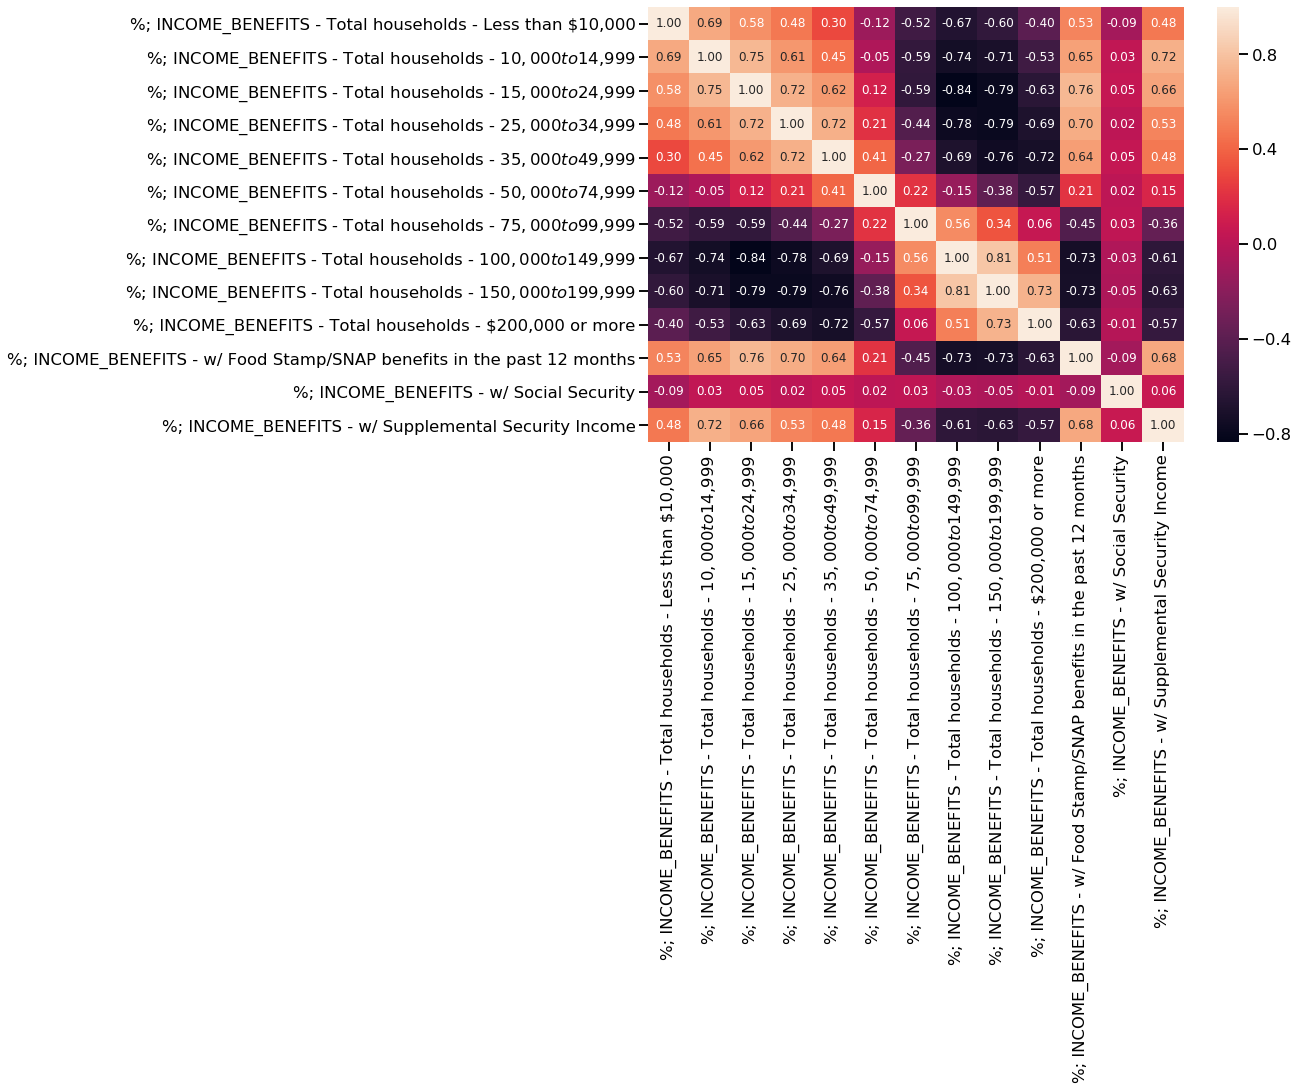

<IPython.core.display.Javascript object>

In [114]:
# Check for correlated and anti-correlated features - done before and after column filtering
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    df_state_info_gs_census[col_census_pct_ib].corr(method="pearson"),
    annot=True,
    fmt="0.2f",
)

/Users/lacar/anaconda/envs/insight/lib/python3.6/site-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


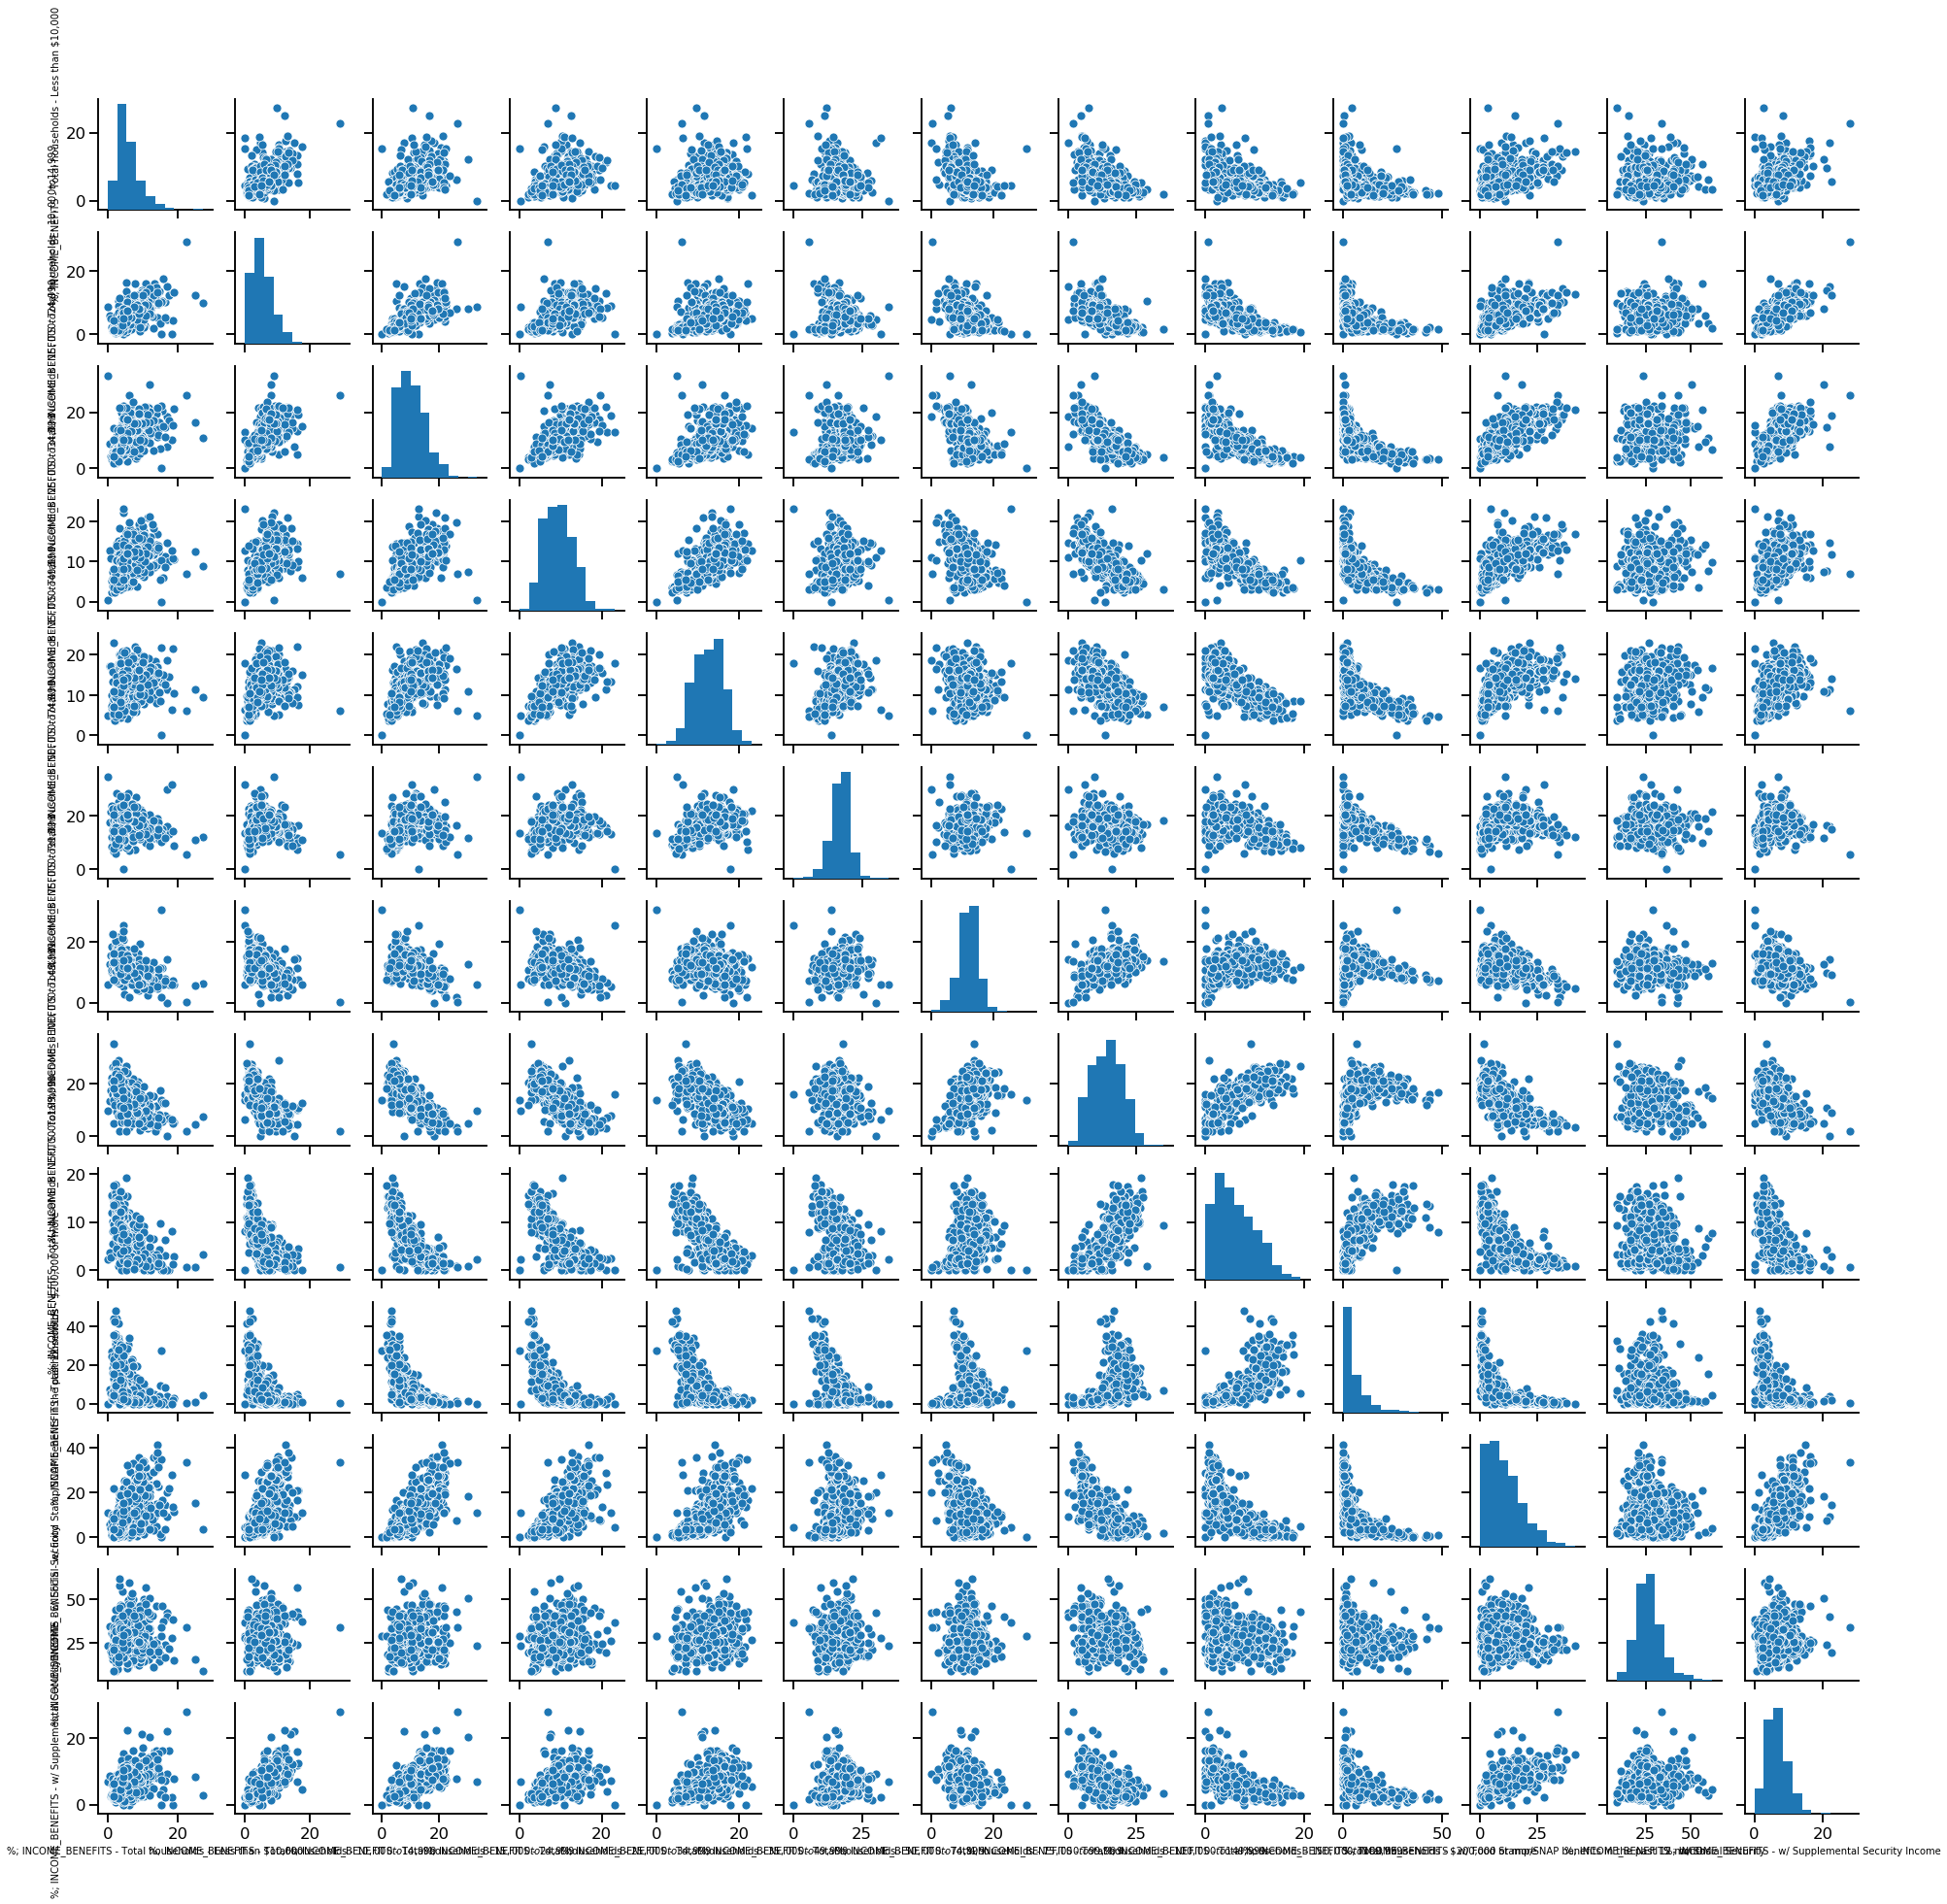

<IPython.core.display.Javascript object>

In [115]:
# Categorical breakdown of percent household income
sns.pairplot(df_state_info_gs_census.loc[:, col_census_pct_ib])

In [116]:
# Iteration 2 - hand select other columns to account for correlations anti-correlations, etc.

# % cash public assistance correlates with Food Stamp benefits
col_census_pct_ib_final = [
    "%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefits in the past 12 months",
    "%; INCOME_BENEFITS - w/ Social Security",
    "%; INCOME_BENEFITS - w/ Supplemental Security Income",
]

<IPython.core.display.Javascript object>

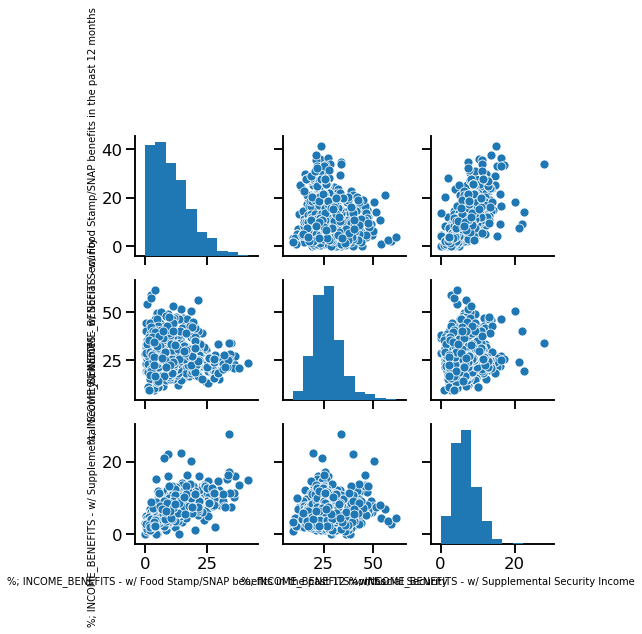

<IPython.core.display.Javascript object>

In [117]:
# Categorical breakdown of percent household income after feature culling
sns.pairplot(df_state_info_gs_census.loc[:, col_census_pct_ib_final]);


In [118]:
# View all correlation values, reshaping table
# df_state_info_gs_census[col_census_pct_ib[0:3]].corr(method='pearson')

<IPython.core.display.Javascript object>

#### Evaluation of estimated income benefits

In [119]:
col_census_est_ib = col_census_est[
    df_state_info_gs_census[col_census_est].columns.str.contains("INCOME_BENEFITS")
]
col_census_est_ib

Index(['Est.; INCOME_BENEFITS - Total households - Median household income ($)',
       'Est.; INCOME_BENEFITS - Total households - Mean household income ($)',
       'Est.; INCOME_BENEFITS - w/ Social Security - Mean Social Security income ($)',
       'Est.; INCOME_BENEFITS - w/ retirement income',
       'Est.; INCOME_BENEFITS - w/ retirement income - Mean retirement income ($)',
       'Est.; INCOME_BENEFITS - w/ cash public assistance income',
       'Est.; INCOME_BENEFITS - w/ cash public assistance income - Mean cash public assistance income ($)',
       'Est.; INCOME_BENEFITS - Families - Median family income ($)',
       'Est.; INCOME_BENEFITS - Families - Mean family income ($)',
       'Est.; INCOME_BENEFITS - Per capita income ($)',
       'Est.; INCOME_BENEFITS - Nonfamily households - Median nonfamily income ($)',
       'Est.; INCOME_BENEFITS - Nonfamily households - Mean nonfamily income ($)'],
      dtype='object')

<IPython.core.display.Javascript object>

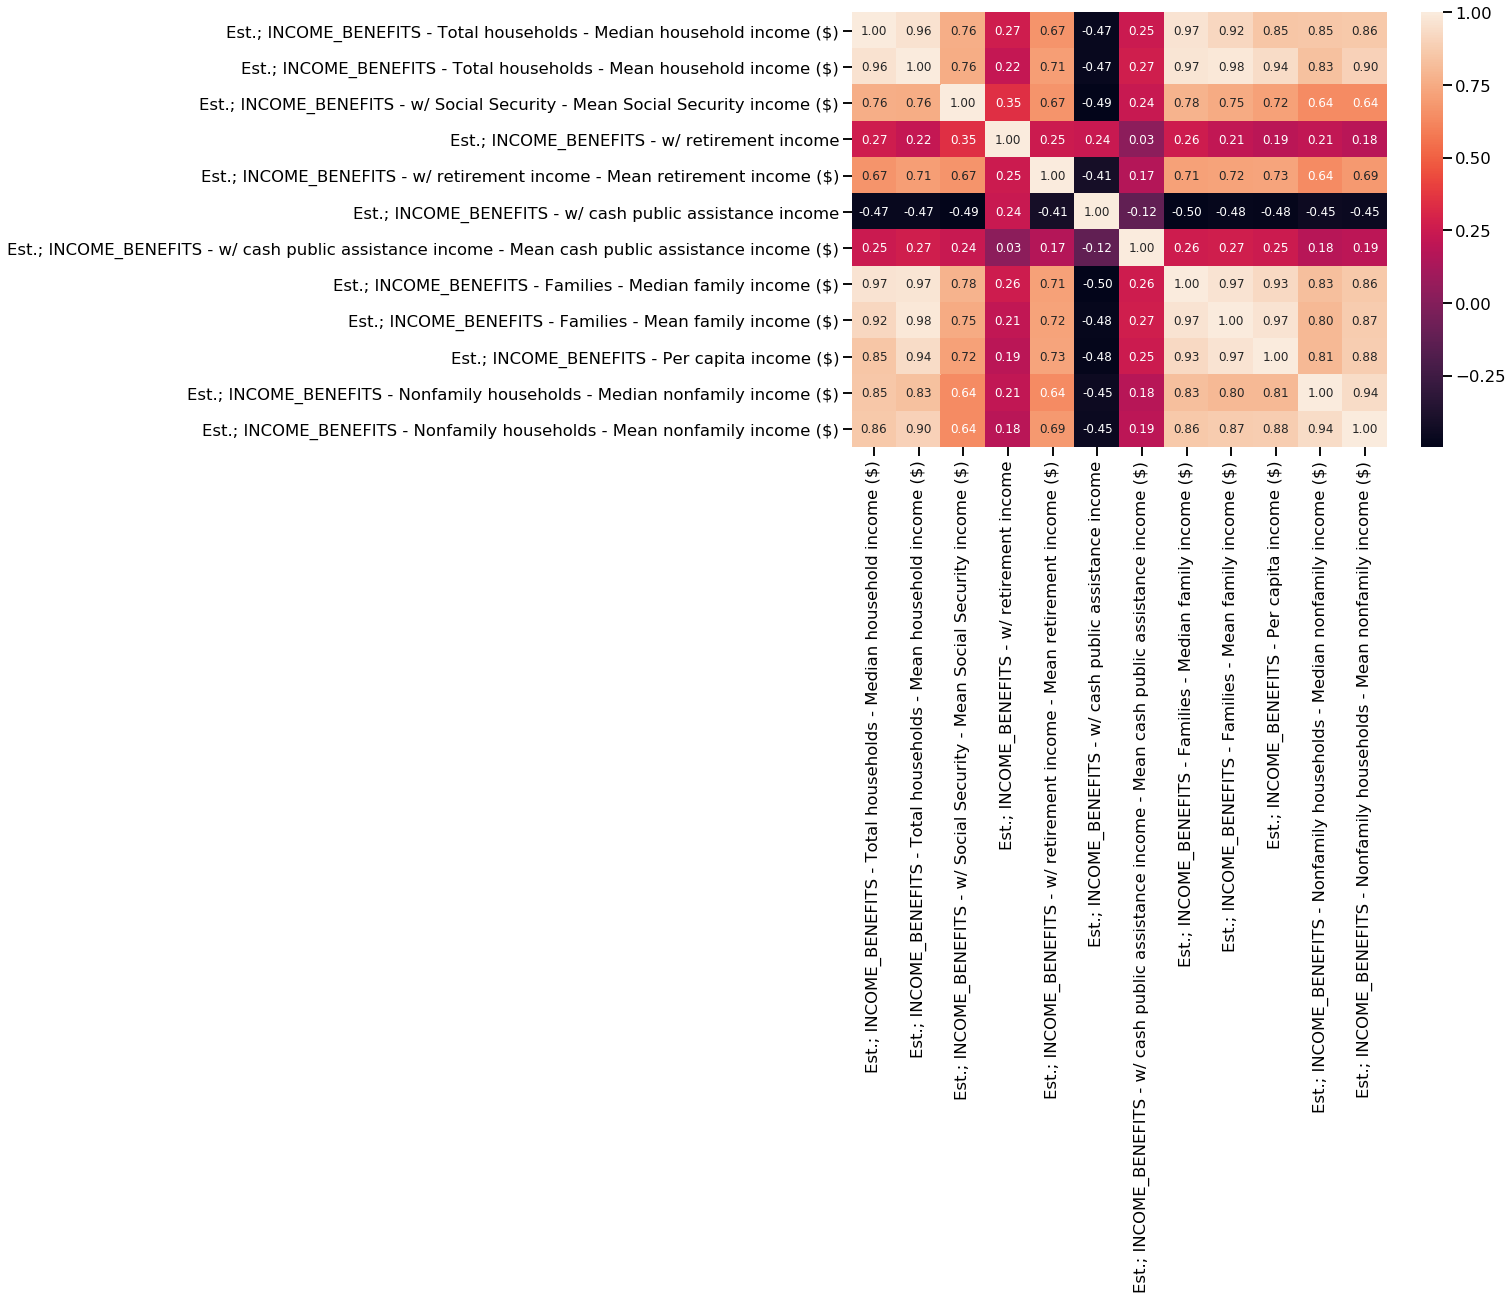

<IPython.core.display.Javascript object>

In [120]:
# Check for correlated and anti-correlated features - done before and after column filtering
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    df_state_info_gs_census[col_census_est_ib].corr(method="pearson"),
    annot=True,
    fmt="0.2f",
)

In [121]:
# Iteration 1 - hand select other columns to account for correlations anti-correlations, etc.
col_census_est_ib_final = [
    "Est.; INCOME_BENEFITS - Total households - Median household income ($)",
    "Est.; INCOME_BENEFITS - w/ retirement income - Mean retirement income ($)",
    "Est.; INCOME_BENEFITS - w/ cash public assistance income - Mean cash public assistance income ($)",
]

<IPython.core.display.Javascript object>

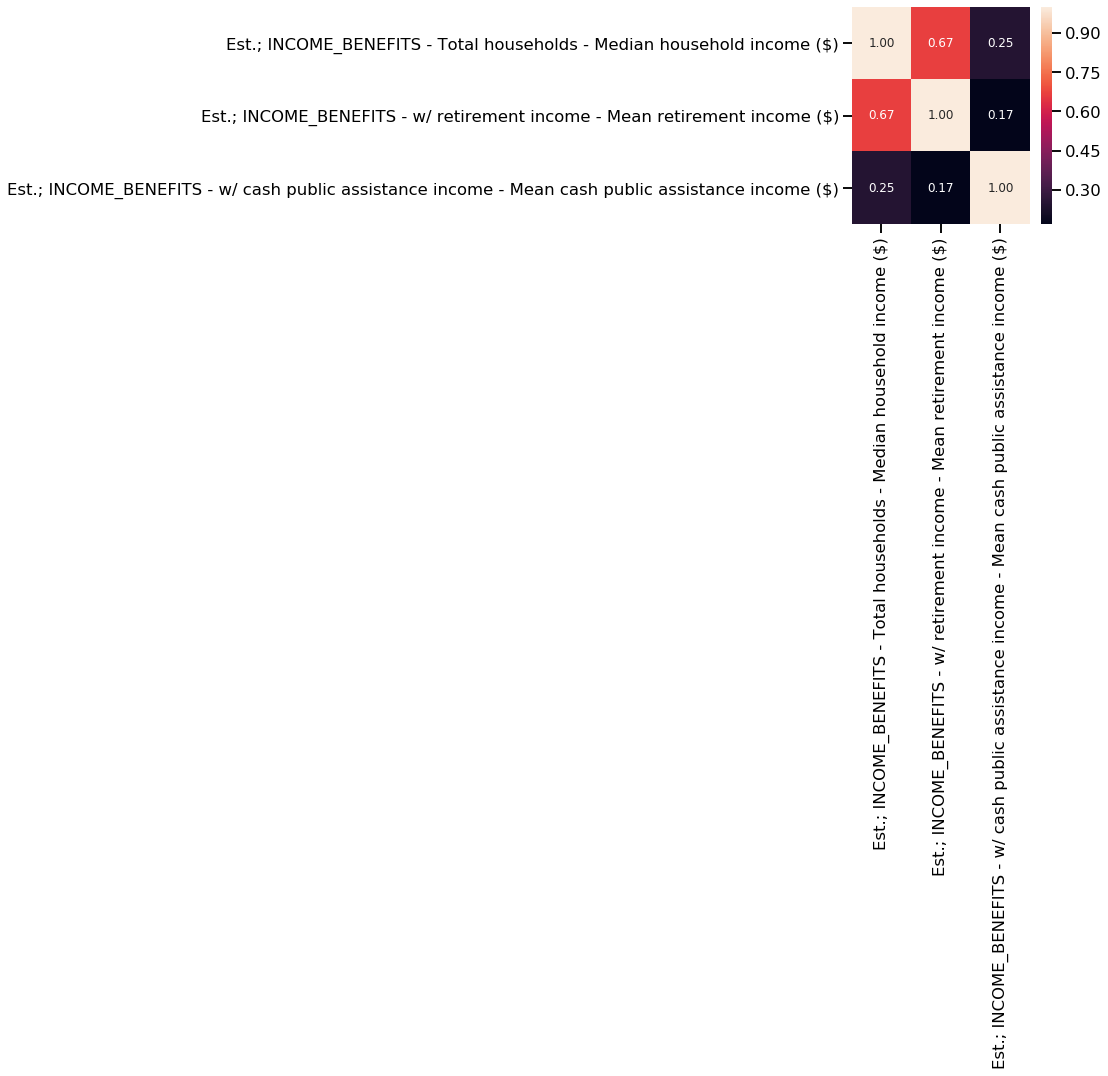

<IPython.core.display.Javascript object>

In [122]:
# Check for correlated and anti-correlated features - done before and after column filtering
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(
    df_state_info_gs_census[col_census_est_ib_final].corr(method="pearson"),
    annot=True,
    fmt="0.2f",
)

#### Examination space with text inspection

In [125]:
category_col = col_census_est[
    df_state_info_gs_census[col_census_est].columns.str.contains("INCOME_BENEFITS")
]
len(category_col)

12

<IPython.core.display.Javascript object>

In [126]:
df_state_info_gs_census[category_col].head()

Est.; INCOME_BENEFITS - Total households - Median household income ($)  \
0                                            32993.0                        
1                                            72884.0                        
3                                            31903.0                        
4                                            80970.0                        
5                                            26478.0                        

   Est.; INCOME_BENEFITS - Total households - Mean household income ($)  \
0                                            55911.0                      
1                                            99612.0                      
3                                            43104.0                      
4                                           105995.0                      
5                                            53679.0                      

   Est.; INCOME_BENEFITS - w/ Social Security - Mean Social Security income ($)  \
0                                            12978.0                              
1                                            17113.0                              
3                                            12293.0                              
4                                            17921.0                              
5                                            13075.0                              

   Est.; INCOME_BENEFITS - w/ retirement income  \
0                                         659.0   
1                                        3804.0   
3                                        1086.0   
4                                        1085.0   
5                                         382.0   

   Est.; INCOME_BENEFITS - w/ retirement income - Mean retirement income ($)  \
0                                            29027.0                           
1                                            32115.0                           
3                                            19269.0                           
4                                            36487.0                           
5                                            40397.0                           

   Est.; INCOME_BENEFITS - w/ cash public assistance income  \
0                                              368.0          
1                                              827.0          
3                                             1268.0          
4                                               83.0          
5                                               78.0          

   Est.; INCOME_BENEFITS - w/ cash public assistance income - Mean cash public assistance income ($)  \
0                                             5055.0                                                   
1                                             4632.0                                                   
3                                             5347.0                                                   
4                                             4229.0                                                   
5                                             8172.0                                                   

   Est.; INCOME_BENEFITS - Families - Median family income ($)  \
0                                            38980.0             
1                                            88693.0             
3                                            34633.0             
4                                            95880.0             
5                                            64432.0             

   Est.; INCOME_BENEFITS - Families - Mean family income ($)  \
0                                            67067.0           
1                                           118416.0           
3                                            44970.0           
4                                           118328.0           
5                                           102605.0           

   Est.; INCOME_

<IPython.core.display.Javascript object>

In [127]:
df_state_info_gs_census[category_col].sum(axis=1)

0       356416.0
1       600439.0
3       254866.0
4       626472.0
5       392005.0
          ...   
1105    434406.0
1106    367796.0
1107    342714.0
1108    342714.0
1109    430859.0
Length: 966, dtype: float64

<IPython.core.display.Javascript object>

#### Examination space with visualizations of various features

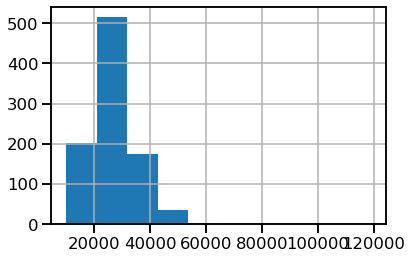

<IPython.core.display.Javascript object>

In [128]:
# Histogram
df_state_info_gs_census[category_col].iloc[:, 4].hist()

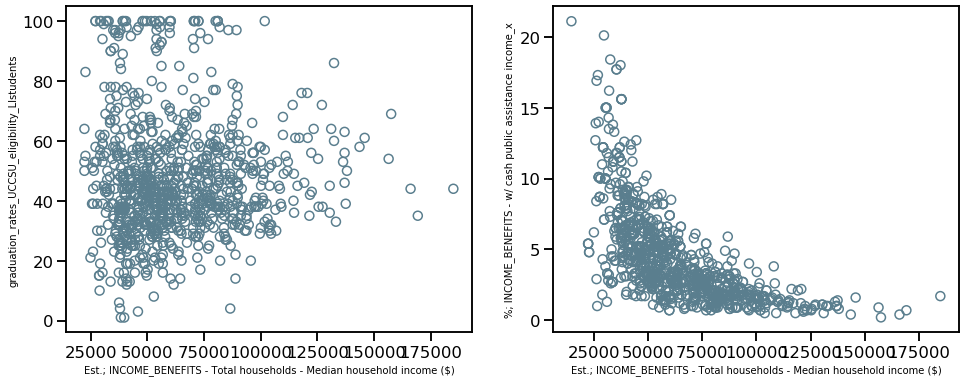

<IPython.core.display.Javascript object>

In [129]:
# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
scatter_plot_open_circles(df_state_info_gs_census, 
                          'Est.; INCOME_BENEFITS - Total households - Median household income ($)', 
                          'graduation_rates_UCCSU_eligibility_LIstudents', 
                          ax1)

scatter_plot_open_circles(df_state_info_gs_census, 
                          'Est.; INCOME_BENEFITS - Total households - Median household income ($)', 
                          '%; INCOME_BENEFITS - w/ cash public assistance income_x', 
                          ax2)


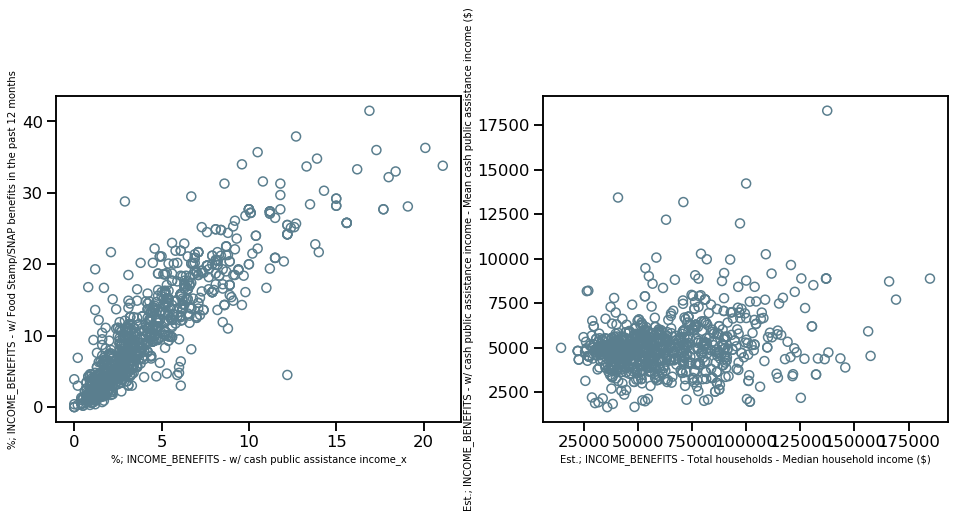

<IPython.core.display.Javascript object>

In [130]:
# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
scatter_plot_open_circles(df_state_info_gs_census, 
                          '%; INCOME_BENEFITS - w/ cash public assistance income_x', 
                          '%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefits in the past 12 months', 
                          ax1)

scatter_plot_open_circles(df_state_info_gs_census, 
                          'Est.; INCOME_BENEFITS - Total households - Median household income ($)',
                          'Est.; INCOME_BENEFITS - w/ cash public assistance income - Mean cash public assistance income ($)', 
                          ax2)


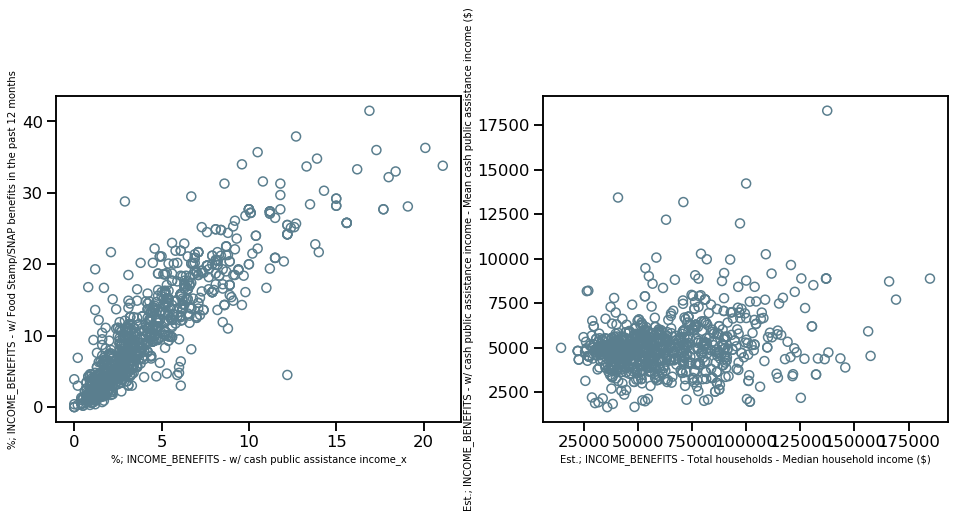

<IPython.core.display.Javascript object>

In [132]:
# Scatter plots - do I need percent and estimated income benefit columns?
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
scatter_plot_open_circles(
    df_state_info_gs_census,
    "%; INCOME_BENEFITS - w/ cash public assistance income_x",
    "%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefits in the past 12 months",
    ax1,
)

scatter_plot_open_circles(
    df_state_info_gs_census,
    "Est.; INCOME_BENEFITS - Total households - Median household income ($)",
    "Est.; INCOME_BENEFITS - w/ cash public assistance income - Mean cash public assistance income ($)",
    ax2,
)

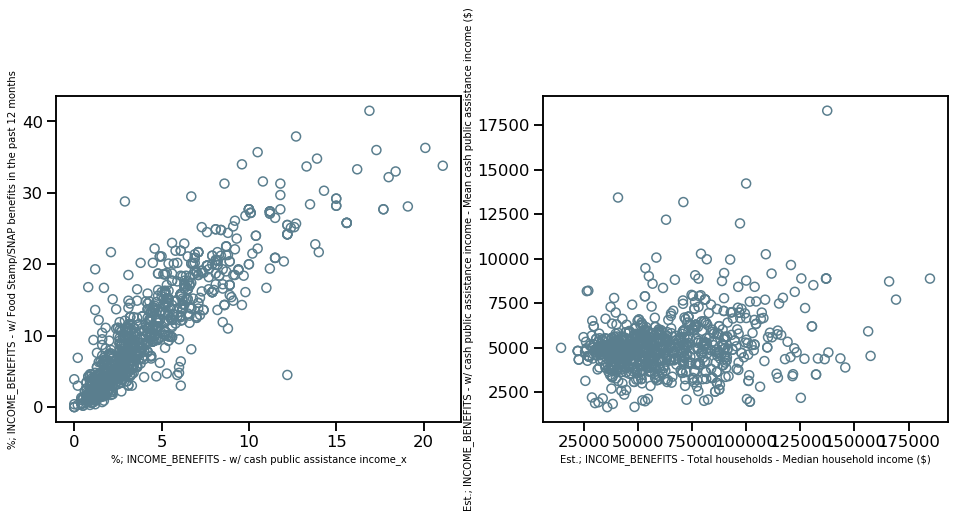

<IPython.core.display.Javascript object>

In [134]:
# Scatter plots - do I need percent and estimated income benefit columns?
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
scatter_plot_open_circles(df_state_info_gs_census, 
                          '%; INCOME_BENEFITS - w/ cash public assistance income_x', 
                          '%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefits in the past 12 months', 
                          ax1)

scatter_plot_open_circles(df_state_info_gs_census, 
                          'Est.; INCOME_BENEFITS - Total households - Median household income ($)',
                          'Est.; INCOME_BENEFITS - w/ cash public assistance income - Mean cash public assistance income ($)', 
                          ax2)


### Health insurance columns

In [138]:
col_census_pct_hi = [col for col in col_census_pct if "HEALTH_INS" in col]
col_census_pct_hi

['%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - No health ins coverage',
 '%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - w/ health ins coverage',
 '%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - w/ health ins coverage - w/ private health insurance',
 '%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - w/ health ins coverage - w/ public coverage',
 '%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. 18-64 yrs - In labor force: - Employed: - No health ins coverage',
 '%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. 18-64 yrs - In labor force: - Employed: - w/ health ins coverage',
 '%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. 18-64 yrs - In labor force: - Employed: - w/ health ins coverage - w/ private health insurance',
 '%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. 18-64 yrs - In labor force: - Employed: - w/ health ins coverage - w/ public coverage',
 '%; HEALTH_INS_COVERAGE -

<IPython.core.display.Javascript object>

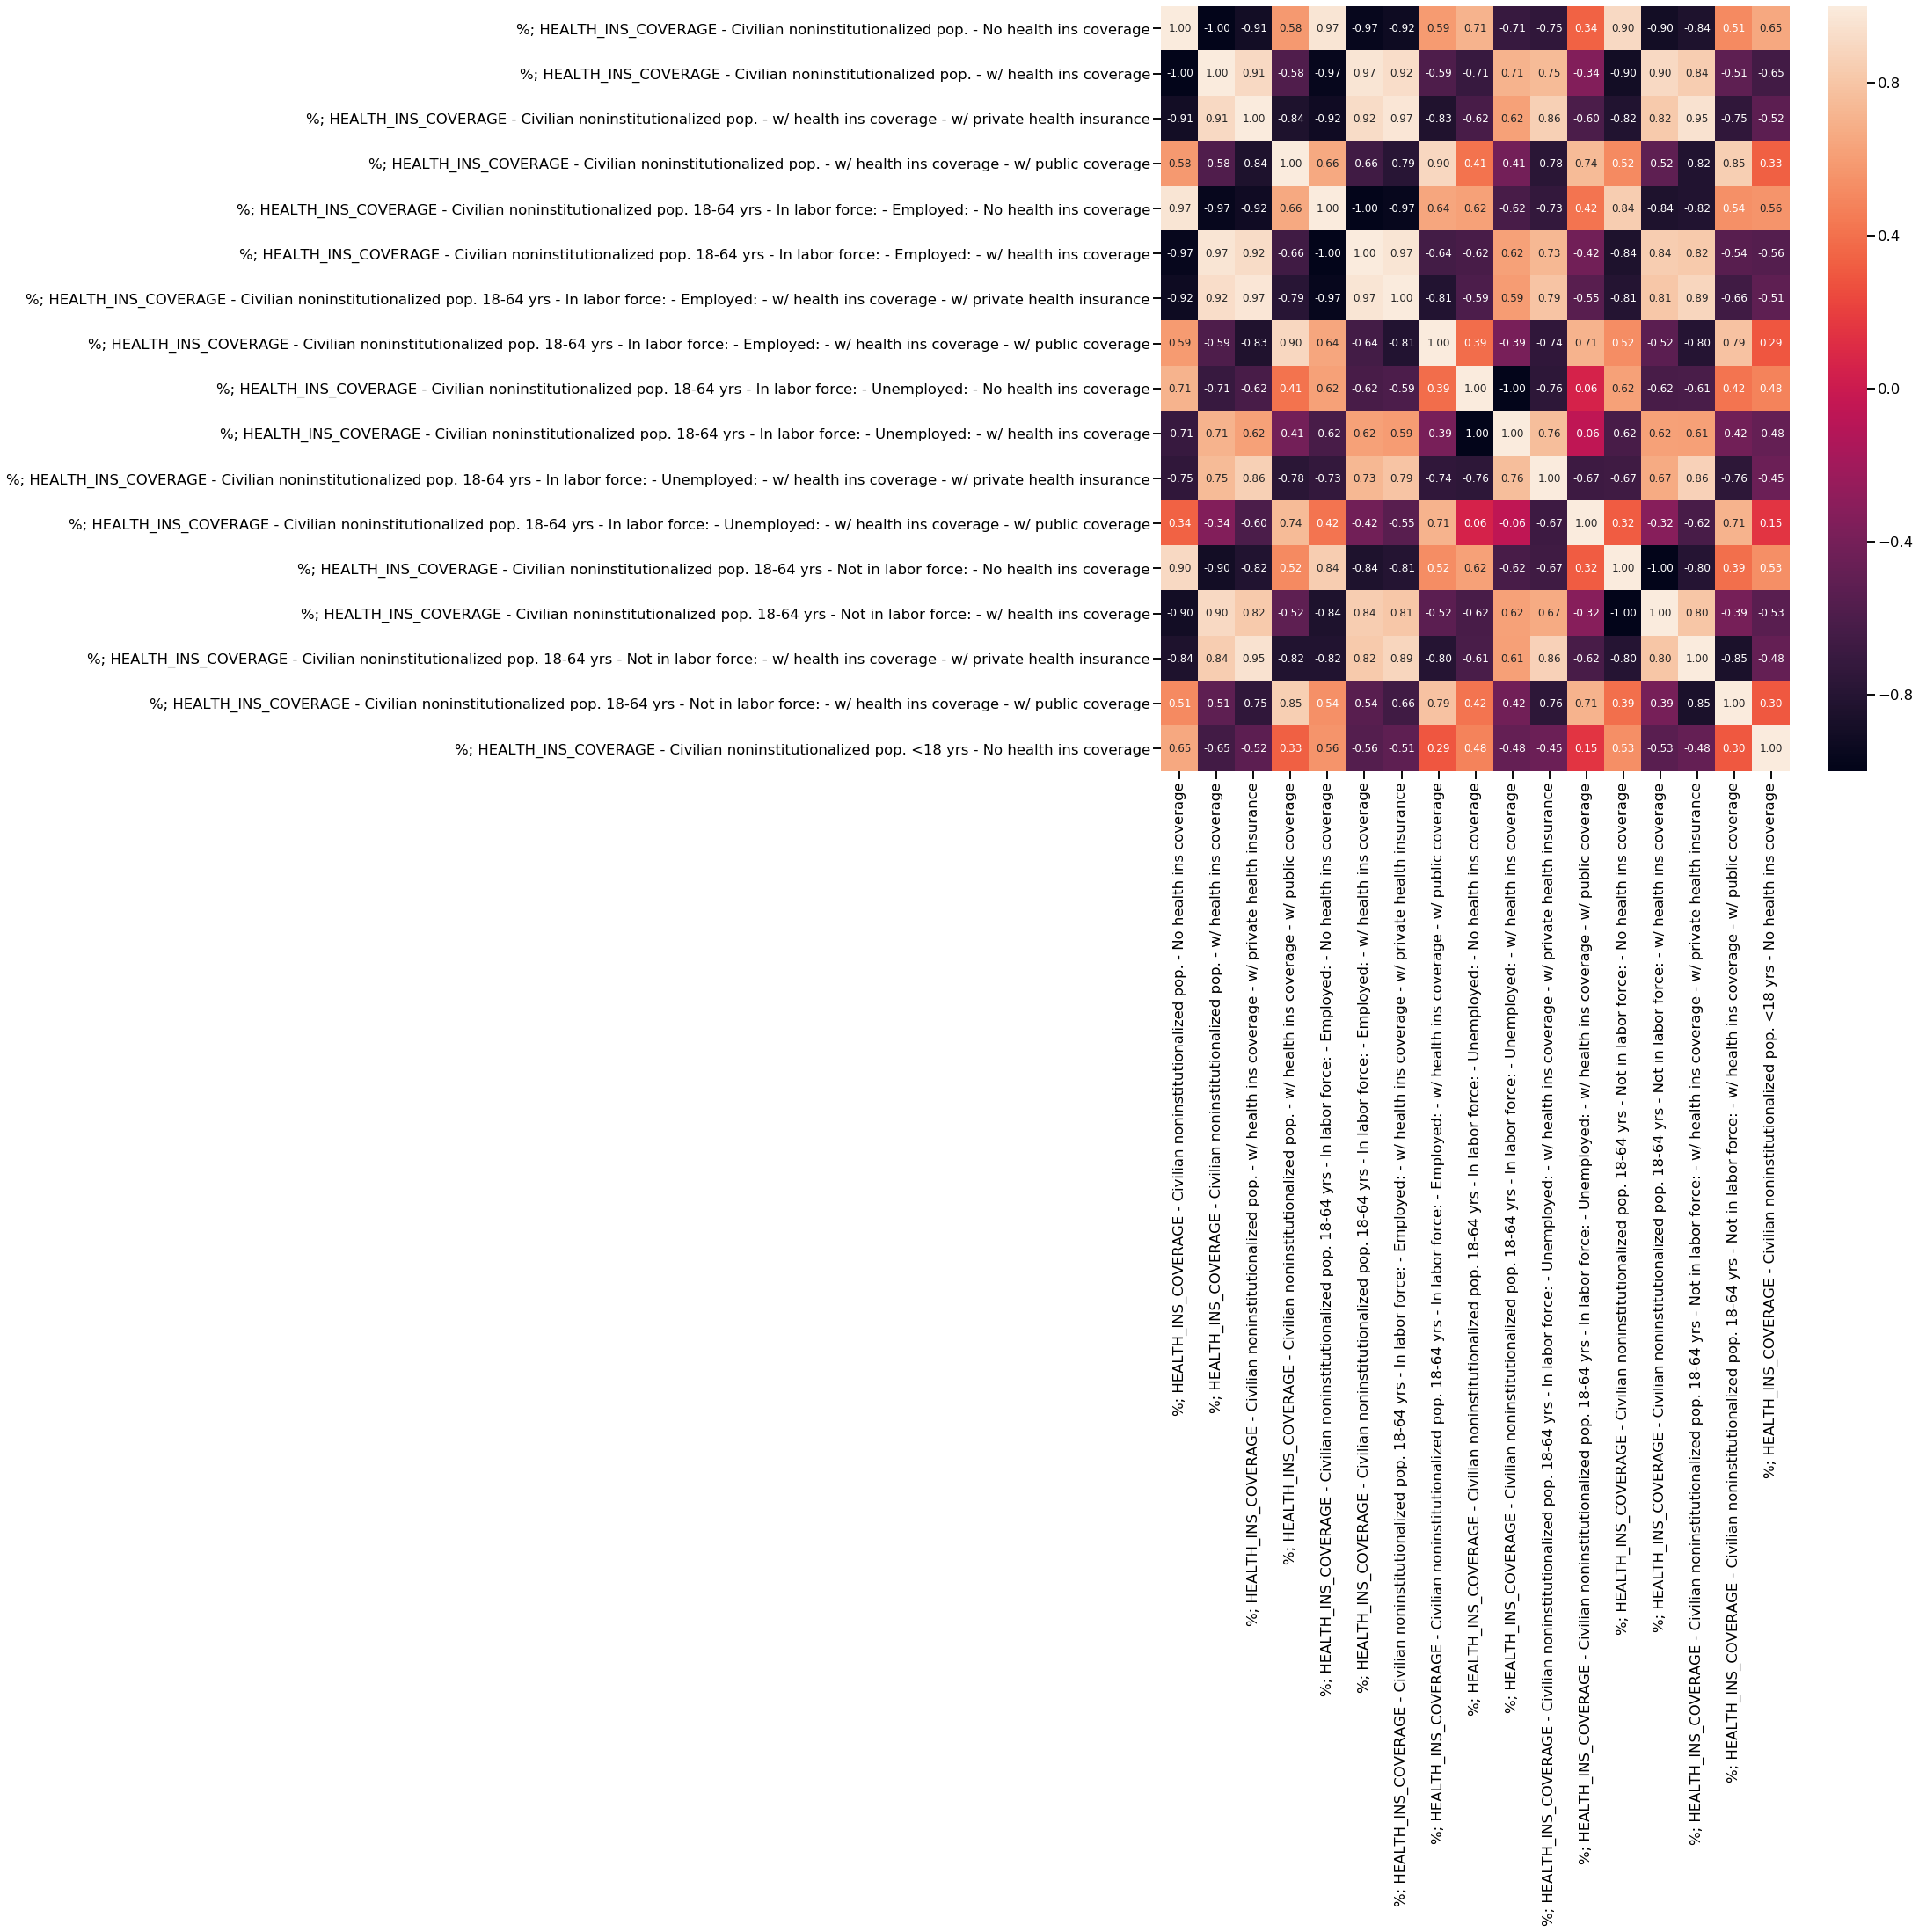

<IPython.core.display.Javascript object>

In [139]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(
    df_state_info_gs_census[col_census_pct_hi].corr(method="pearson"),
    annot=True,
    fmt="0.2f",
)

In [140]:
# Iteration 1 - hand select other columns to account for correlations anti-correlations, etc.
# Removed those with

col_census_pct_hi_v0 = [
    "%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - w/ health ins coverage",
    "%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - w/ health ins coverage - w/ public coverage",
    "%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. <18 yrs - No health ins coverage",
]

<IPython.core.display.Javascript object>

In [141]:
df_state_info_gs_census[col_census_pct_hi_v0].corr(method="pearson")

%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - w/ health ins coverage  \
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                           1.000000                                      
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                          -0.581482                                      
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                          -0.653922                                      

                                                    %; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - w/ health ins coverage - w/ public coverage  \
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                          -0.581482                                                           
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                           1.000000                                                           
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                           0.331349                                                           

                                                    %; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. <18 yrs - No health ins coverage  
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                          -0.653922                                             
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                           0.331349                                             
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                           1.000000

<IPython.core.display.Javascript object>

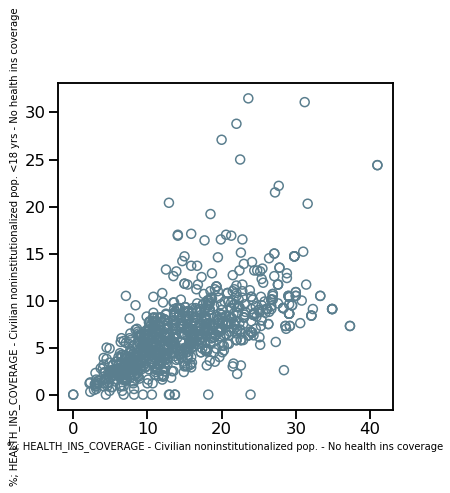

<IPython.core.display.Javascript object>

In [142]:
# Scatter plots - do I need percent and estimated income benefit columns?
f, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
scatter_plot_open_circles(
    df_state_info_gs_census,
    "%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - No health ins coverage",
    "%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. <18 yrs - No health ins coverage",
    ax1,
)

In [143]:
col_census_pct_hi_final = col_census_pct_hi_v0.copy()
col_census_pct_hi_final

['%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - w/ health ins coverage',
 '%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. - w/ health ins coverage - w/ public coverage',
 '%; HEALTH_INS_COVERAGE - Civilian noninstitutionalized pop. <18 yrs - No health ins coverage']

<IPython.core.display.Javascript object>

### Work commute columns

In [144]:
col_census_pct_wc = [col for col in col_census_pct if "WORK_COMMUTE" in col]
col_census_pct_wc

['%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- carpooled',
 '%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- drove alone',
 '%; WORK_COMMUTE - Workers 16 yrs and up - Other means',
 '%; WORK_COMMUTE - Workers 16 yrs and up - Public transportation (excluding taxicab)',
 '%; WORK_COMMUTE - Workers 16 yrs and up - Walked',
 '%; WORK_COMMUTE - Workers 16 yrs and up - Worked at home']

<IPython.core.display.Javascript object>

In [145]:
df_state_info_gs_census[col_census_pct_wc].corr(method="pearson")

%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- carpooled  \
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                           1.000000                           
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                          -0.164392                           
%; WORK_COMMUTE - Workers 16 yrs and up - Other...                                          -0.065099                           
%; WORK_COMMUTE - Workers 16 yrs and up - Publi...                                          -0.098678                           
%; WORK_COMMUTE - Workers 16 yrs and up - Walked                                            -0.166163                           
%; WORK_COMMUTE - Workers 16 yrs and up - Worke...                                          -0.437000                           

                                                    %; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- drove alone  \
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                          -0.164392                             
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                           1.000000                             
%; WORK_COMMUTE - Workers 16 yrs and up - Other...                                          -0.490504                             
%; WORK_COMMUTE - Workers 16 yrs and up - Publi...                                          -0.796416                             
%; WORK_COMMUTE - Workers 16 yrs and up - Walked                                            -0.648986                             
%; WORK_COMMUTE - Workers 16 yrs and up - Worke...                                          -0.164221                             

                                                    %; WORK_COMMUTE - Workers 16 yrs and up - Other means  \
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                          -0.065099       
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                          -0.490504       
%; WORK_COMMUTE - Workers 16 yrs and up - Other...                                           1.000000       
%; WORK_COMMUTE - Workers 16 yrs and up - Publi...                                           0.230473       
%; WORK_COMMUTE - Workers 16 yrs and up - Walked                                             0.352367       
%; WORK_COMMUTE - Workers 16 yrs and up - Worke...                                           0.009150       

                                                    %; WORK_COMMUTE - Workers 16 yrs and up - Public transportation (excluding taxicab)  \
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                          -0.098678                                     
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                          -0.796416                                     
%; WORK_COMMUTE - Workers 16 yrs and up - Other...                                           0.230473                                     
%; WORK_COMMUTE - Workers 16 yrs and up - Publi...                                           1.000000                                     
%; WORK_COMMUTE - Workers 16 yrs and up - Walked                                             0.374970                                     
%; WORK_COMMUTE - Workers 16 yrs and up - Worke...                                          -0.057878                                     

                                                    %; WORK_COMMUTE - Workers 16 yrs and up - Walked  \
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                         -0.166163   
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                         -0.648986   
%; WORK_COMMUTE - Workers 16 yrs and up - Other...                                          0.352367   
%; WORK_COMMUTE - Workers 16 yrs and up - Publi...                          

<IPython.core.display.Javascript object>

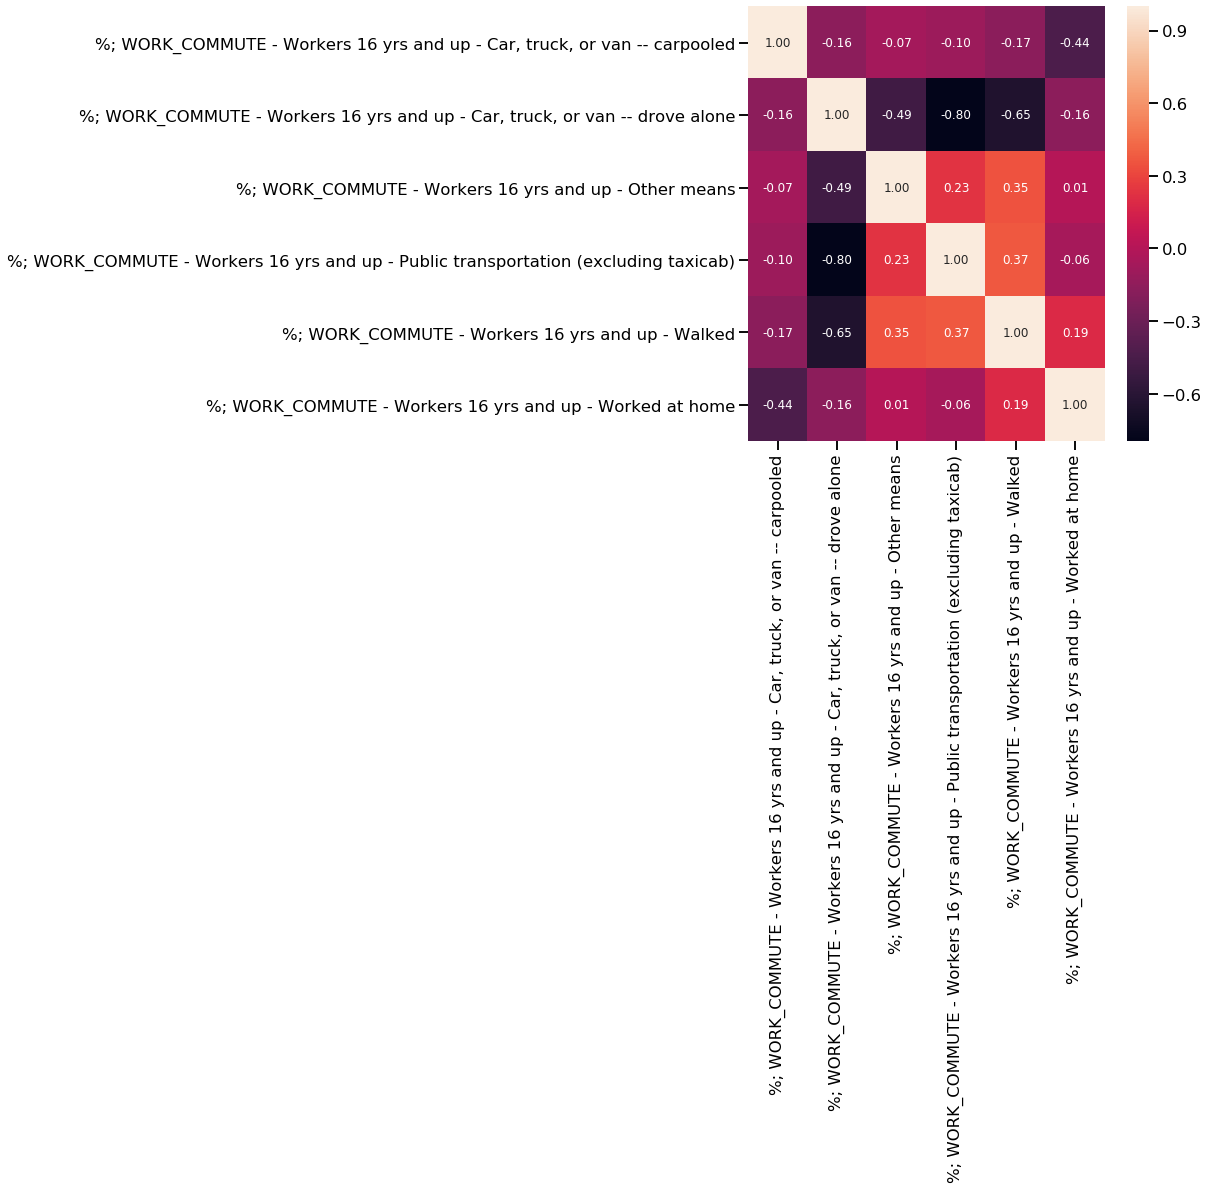

<IPython.core.display.Javascript object>

In [146]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    df_state_info_gs_census[col_census_pct_wc].corr(method="pearson"),
    annot=True,
    fmt="0.2f",
)

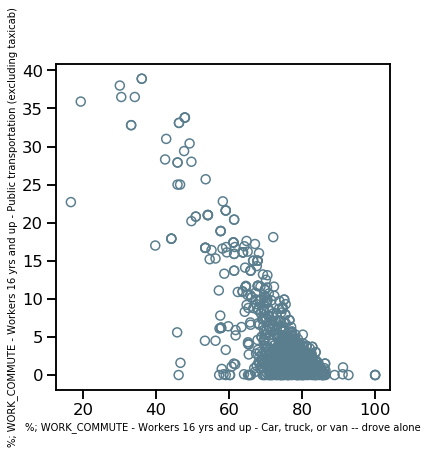

<IPython.core.display.Javascript object>

In [147]:
# Scatter plots - do I need percent and estimated income benefit columns?
f, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
scatter_plot_open_circles(
    df_state_info_gs_census,
    "%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- drove alone",
    "%; WORK_COMMUTE - Workers 16 yrs and up - Public transportation (excluding taxicab)",
    ax1,
)

**The Pearson is -.0.75. It's borderline, but I'll keep both "drove alone" and "public transportation" since it's possible that they could be giving different information. But I will drop "other" and "work from home"**

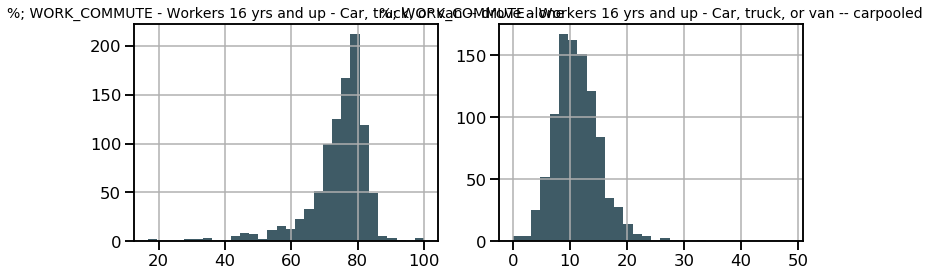

<IPython.core.display.Javascript object>

In [148]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

hist_plot(
    df_state_info_gs_census,
    "%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- drove alone",
    ax1,
)

hist_plot(
    df_state_info_gs_census,
    "%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- carpooled",
    ax2,
)

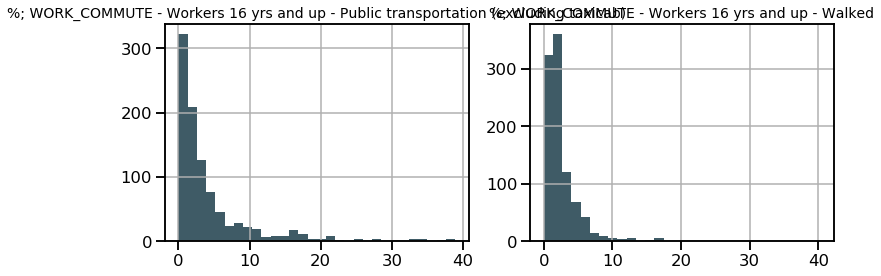

<IPython.core.display.Javascript object>

In [149]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

hist_plot(
    df_state_info_gs_census,
    "%; WORK_COMMUTE - Workers 16 yrs and up - Public transportation (excluding taxicab)",
    ax1,
)

hist_plot(
    df_state_info_gs_census, "%; WORK_COMMUTE - Workers 16 yrs and up - Walked", ax2,
)

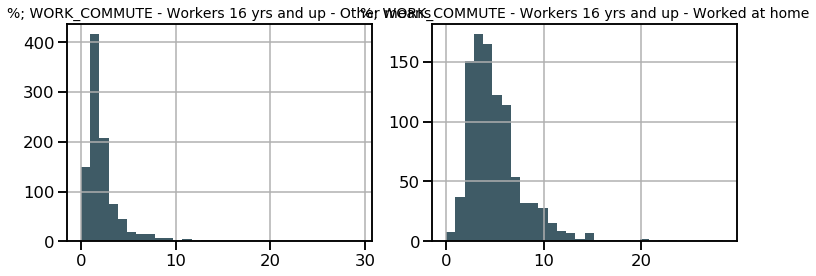

<IPython.core.display.Javascript object>

In [150]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

hist_plot(
    df_state_info_gs_census,
    "%; WORK_COMMUTE - Workers 16 yrs and up - Other means",
    ax1,
)

hist_plot(
    df_state_info_gs_census,
    "%; WORK_COMMUTE - Workers 16 yrs and up - Worked at home",
    ax2,
)

In [152]:
# Chose these since they had a more normal distribution and minimized correlations/anti-correlations
col_census_pct_wc_final = [
    "%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- drove alone",
    "%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- carpooled",
    "%; WORK_COMMUTE - Workers 16 yrs and up - Public transportation (excluding taxicab)",
    "%; WORK_COMMUTE - Workers 16 yrs and up - Walked",
    "%; WORK_COMMUTE - Workers 16 yrs and up - Worked at home",
]

<IPython.core.display.Javascript object>

### Occupation and industry columns

In [153]:
col_census_pct_occ = [col for col in col_census_pct if "OCCUPATION" in col]
col_census_pct_occ

['%; OCCUPATION - Civilian employed pop. 16 yrs and up - Management, business, science, and arts occupations',
 '%; OCCUPATION - Civilian employed pop. 16 yrs and up - Natural resources, construction, and maintenance occupations',
 '%; OCCUPATION - Civilian employed pop. 16 yrs and up - Production, transportation, and material moving occupations',
 '%; OCCUPATION - Civilian employed pop. 16 yrs and up - Sales and office occupations',
 '%; OCCUPATION - Civilian employed pop. 16 yrs and up - Service occupations']

<IPython.core.display.Javascript object>

In [154]:
df_state_info_gs_census[col_census_pct_occ].corr(method="pearson")

%; OCCUPATION - Civilian employed pop. 16 yrs and up - Management, business, science, and arts occupations  \
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           1.000000                                                            
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.661820                                                            
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.813368                                                            
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.083980                                                            
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.674378                                                            

                                                    %; OCCUPATION - Civilian employed pop. 16 yrs and up - Natural resources, construction, and maintenance occupations  \
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.661820                                                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           1.000000                                                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           0.393881                                                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.410011                                                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           0.203944                                                                     

                                                    %; OCCUPATION - Civilian employed pop. 16 yrs and up - Production, transportation, and material moving occupations  \
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.813368                                                                    
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           0.393881                                                                    
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           1.000000                                                                    
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           0.020743                                                                    
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           0.374049                                                                    

                                                    %; OCCUPATION - Civilian employed pop. 16 yrs and up - Sales and office occupations  \
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.083980                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.410011                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           0.020743                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           1.000000                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           0.026963                                     

                                                    %; OCCUPATION - Civilian employed pop. 16 yrs and up - Service occupations  
%; OCCUPATION - Civilian employed pop. 16 yrs a...                 

<IPython.core.display.Javascript object>

In [156]:
col_census_pct_industry = [col for col in col_census_pct if "INDUSTRY" in col]
col_census_pct_industry

['%; INDUSTRY - Civilian employed pop. 16 yrs and up - Agriculture, forestry, fishing and hunting, and mining',
 '%; INDUSTRY - Civilian employed pop. 16 yrs and up - Arts, entertainment, and recreation, and accommodation and food services',
 '%; INDUSTRY - Civilian employed pop. 16 yrs and up - Construction',
 '%; INDUSTRY - Civilian employed pop. 16 yrs and up - Educational services, and health care and social assistance',
 '%; INDUSTRY - Civilian employed pop. 16 yrs and up - Finance and insurance, and real estate and rental and leasing',
 '%; INDUSTRY - Civilian employed pop. 16 yrs and up - Information',
 '%; INDUSTRY - Civilian employed pop. 16 yrs and up - Manufacturing',
 '%; INDUSTRY - Civilian employed pop. 16 yrs and up - Other services, except public administration',
 '%; INDUSTRY - Civilian employed pop. 16 yrs and up - Professional, scientific, and management, and administrative and waste management services',
 '%; INDUSTRY - Civilian employed pop. 16 yrs and up - Public 

<IPython.core.display.Javascript object>

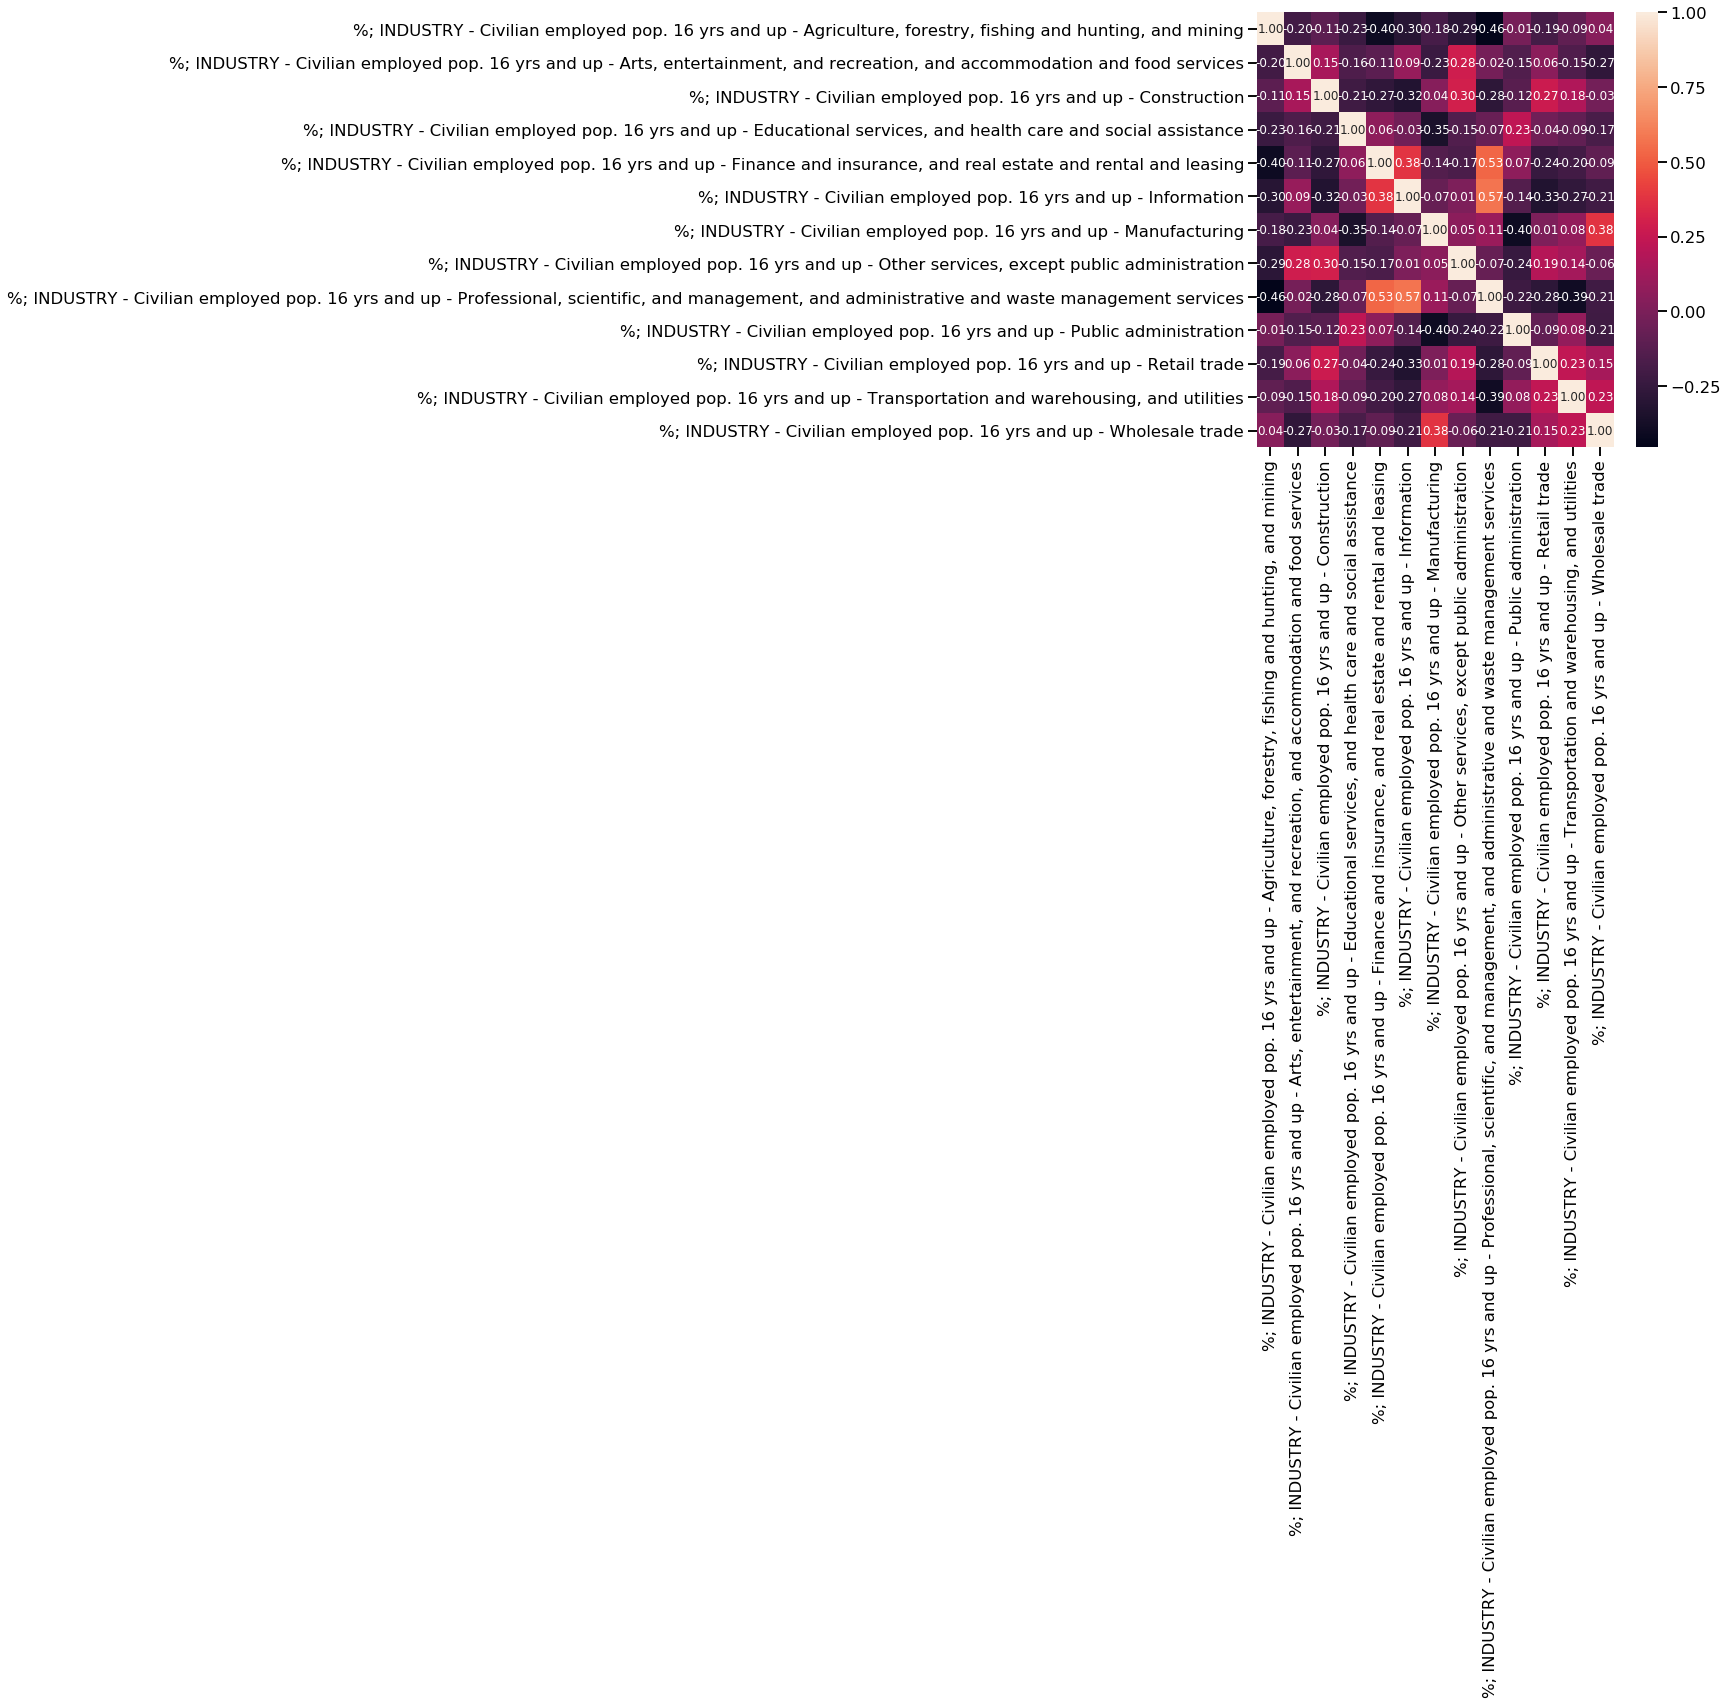

<IPython.core.display.Javascript object>

In [157]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    df_state_info_gs_census[col_census_pct_industry].corr(method="pearson"),
    annot=True,
    fmt="0.2f",
)

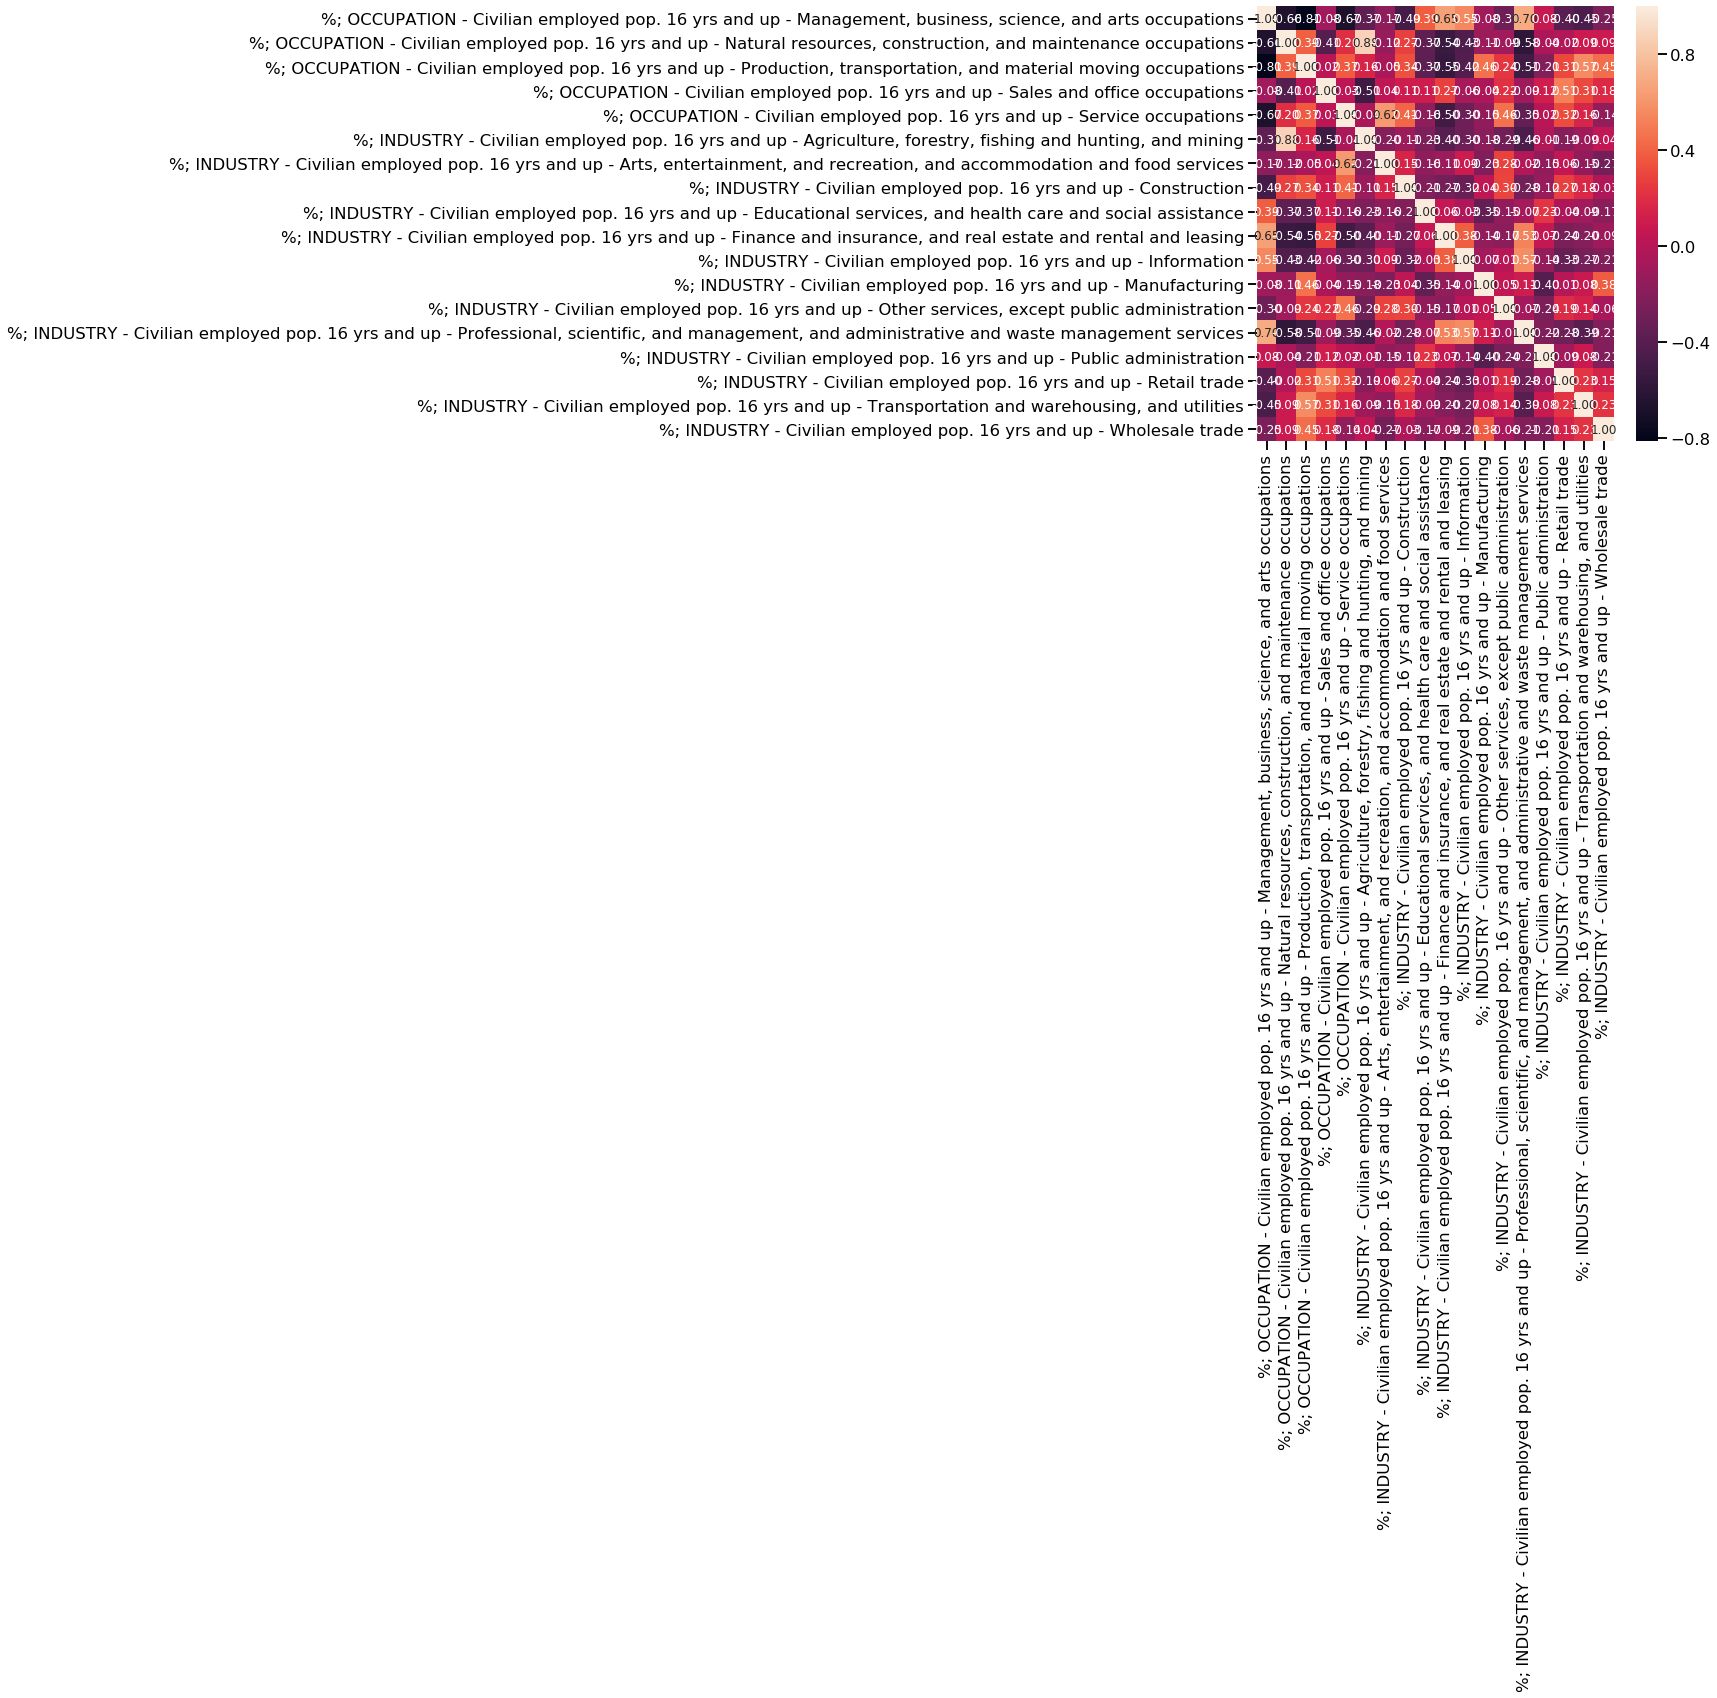

<IPython.core.display.Javascript object>

In [177]:
# Occupational and industry columns
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    df_state_info_gs_census[col_census_pct_occ + col_census_pct_industry].corr(
        method="pearson"
    ),
    annot=True,
    fmt="0.2f",
)

In [178]:
df_state_info_gs_census[col_census_pct_occ + col_census_pct_industry].corr(
    method="pearson"
)

%; OCCUPATION - Civilian employed pop. 16 yrs and up - Management, business, science, and arts occupations  \
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           1.000000                                                            
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.661820                                                            
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.813368                                                            
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.083980                                                            
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.674378                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.366288                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.165185                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.485156                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.390734                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.646317                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.551204                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.084972                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.303397                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.696205                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.076246                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.398131                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.453053                                                            
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.245334                                                            

                                                    %; OCCUPATION - Civilian employed pop. 16 yrs and up - Natural resources, construction, and maintenance occupations  \
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.661820                                                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           1.000000                                                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           0.393881                                                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                          -0.410011                                                                     
%; OCCUPATION - Civilian employed pop. 16 yrs a...                                           0.203944                 

<IPython.core.display.Javascript object>

**I'll keep the industry columns but drop the occupation columns. The former is more variable and has fewer correlations/anti-correlations.**

In [180]:
col_census_pct_industry_final = col_census_pct_industry.copy()

<IPython.core.display.Javascript object>

### Worker class columns

In [321]:
col_census_pct_workerclass = col_census_pct[
    df_state_info_gs_census[col_census_pct].columns.str.contains("WORKER_CLASS")
].tolist()

df_state_info_gs_census[col_census_pct_workerclass].corr(method="pearson")

%; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Private wage and salary workers  \
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                           1.000000                                          
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                          -0.855091                                          
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                          -0.424615                                          
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                          -0.223774                                          

                                                    %; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Government workers  \
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                          -0.855091                             
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                           1.000000                             
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                          -0.084067                             
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                           0.050251                             

                                                    %; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Self-employed in own not incorporated business workers  \
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                          -0.424615                                                                 
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                          -0.084067                                                                 
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                           1.000000                                                                 
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                           0.072156                                                                 

                                                    %; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Unpaid family workers  
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                          -0.223774                               
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                           0.050251                               
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                           0.072156                               
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                           1.000000

<IPython.core.display.Javascript object>

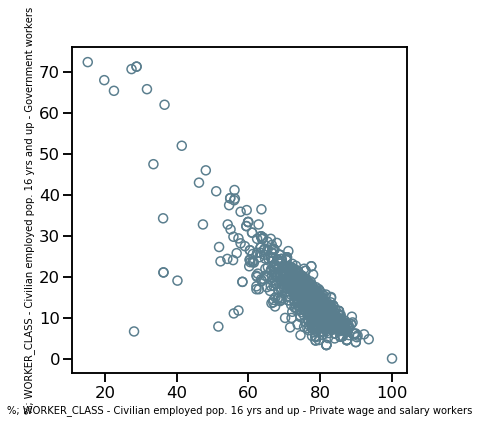

<IPython.core.display.Javascript object>

In [322]:
# Scatter plots - do I need percent and estimated income benefit columns?
f, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
scatter_plot_open_circles(
    df_state_info_gs_census,
    "%; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Private wage and salary workers",
    "%; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Government workers",
    ax1,
)

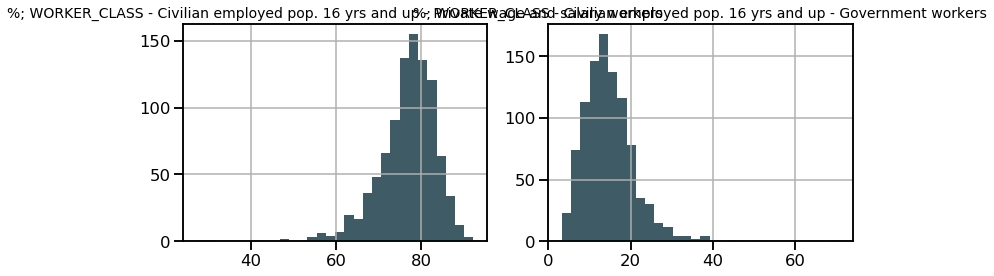

<IPython.core.display.Javascript object>

In [161]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

hist_plot(
    df_state_info_gs_census,
    "%; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Private wage and salary workers",
    ax1,
)

hist_plot(
    df_state_info_gs_census,
    "%; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Government workers",
    ax2,
)

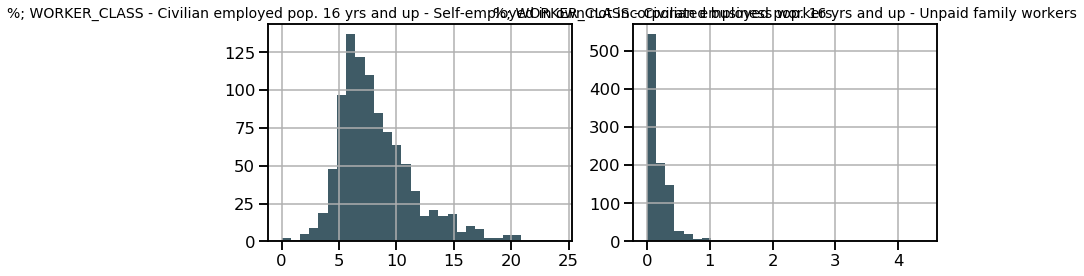

<IPython.core.display.Javascript object>

In [162]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

hist_plot(
    df_state_info_gs_census,
    "%; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Self-employed in own not incorporated business workers",
    ax1,
)

hist_plot(
    df_state_info_gs_census,
    "%; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Unpaid family workers",
    ax2,
)

**Drop government workers since they're highly correlated with private wage and salary workers. Also drop Unpaid family workers since they're pretty rare.**

In [163]:
col_census_pct_workerclass_final = [
    "%; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Private wage and salary workers",
    "%; WORKER_CLASS - Civilian employed pop. 16 yrs and up - Self-employed in own not incorporated business workers",
]

<IPython.core.display.Javascript object>

### Employment status columns

In [165]:
col_census_pct_employstatus = [col for col in col_census_pct if "EMPLOY_STATUS" in col]
df_state_info_gs_census[col_census_pct_employstatus].corr(method="pearson")

%; EMPLOY_STATUS - Civilian labor force - Unemployment Rate  \
%; EMPLOY_STATUS - Civilian labor force - Unemp...                                           1.000000             
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                          -0.328926             
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                          -0.322421             
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                          -0.567519             
%; EMPLOY_STATUS - Own children of the househol...                                          -0.222267             
%; EMPLOY_STATUS - Own children of the househol...                                          -0.125891             
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                          -0.359959             
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                          -0.054025             
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                          -0.344712             
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                          -0.613562             
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                           0.937749             
%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in ...                                           0.359959             

                                                    %; EMPLOY_STATUS - Females 16 yrs and up - In labor force  \
%; EMPLOY_STATUS - Civilian labor force - Unemp...                                          -0.328926           
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                           1.000000           
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                           0.997199           
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                           0.944545           
%; EMPLOY_STATUS - Own children of the househol...                                           0.545221           
%; EMPLOY_STATUS - Own children of the househol...                                           0.464625           
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                           0.823139           
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                           0.019791           
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                           0.811395           
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                           0.792761           
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                          -0.090603           
%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in ...                                          -0.823139           

                                                    %; EMPLOY_STATUS - Females 16 yrs and up - In labor force - Civilian labor force  \
%; EMPLOY_STATUS - Civilian labor force - Unemp...                                          -0.322421                                  
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                           0.997199                                  
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                           1.000000                                  
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                           0.945086                                  
%; EMPLOY_STATUS - Own children of the househol...                                           0.546049                                  
%; EMPLOY_STATUS - Own children of the househol...                                           0.470404                                  
%; EMPLOY_STATUS - Pop. 16 yrs and up - In labo...                                           0.818249                                 

<IPython.core.display.Javascript object>

In [327]:
col_census_pct_employstatus

['%; EMPLOY_STATUS - Pop. 16 yrs and up - In labor force',
 '%; EMPLOY_STATUS - Pop. 16 yrs and up - In labor force - Civilian labor force',
 '%; EMPLOY_STATUS - Pop. 16 yrs and up - In labor force - Civilian labor force - Employed',
 '%; EMPLOY_STATUS - Pop. 16 yrs and up - In labor force - Civilian labor force - Unemployed',
 '%; EMPLOY_STATUS - Pop. 16 yrs and up - In labor force - Armed Forces',
 '%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in labor force',
 '%; EMPLOY_STATUS - Civilian labor force - Unemployment Rate',
 '%; EMPLOY_STATUS - Females 16 yrs and up - In labor force',
 '%; EMPLOY_STATUS - Females 16 yrs and up - In labor force - Civilian labor force',
 '%; EMPLOY_STATUS - Females 16 yrs and up - In labor force - Civilian labor force - Employed',
 '%; EMPLOY_STATUS - Own children of the householder under 6 yrs - All parents in family in labor force',
 '%; EMPLOY_STATUS - Own children of the householder 6 to 17 yrs - All parents in family in labor force']

<IPython.core.display.Javascript object>

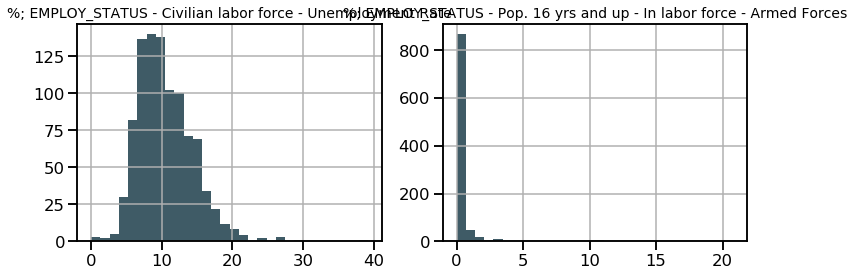

<IPython.core.display.Javascript object>

In [167]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

hist_plot(
    df_state_info_gs_census,
    "%; EMPLOY_STATUS - Civilian labor force - Unemployment Rate",
    ax1,
)

hist_plot(
    df_state_info_gs_census,
    "%; EMPLOY_STATUS - Pop. 16 yrs and up - In labor force - Armed Forces",
    ax2,
)

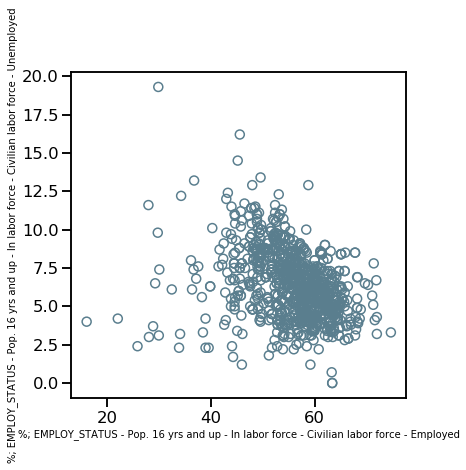

<IPython.core.display.Javascript object>

In [168]:
# Note - I don't entirely understand why
# "In labor force - Civilian labor force - Employed and Civilian labor force" and "Unemployment Rate" are not anti-correlated
# I'll keep only the latter

f, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
scatter_plot_open_circles(
    df_state_info_gs_census,
    "%; EMPLOY_STATUS - Pop. 16 yrs and up - In labor force - Civilian labor force - Employed",
    "%; EMPLOY_STATUS - Pop. 16 yrs and up - In labor force - Civilian labor force - Unemployed",
    ax1,
)

In [169]:
col_census_pct_employstatus_final = [
    "%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in labor force",
    "%; EMPLOY_STATUS - Civilian labor force - Unemployment Rate",
    "%; EMPLOY_STATUS - Females 16 yrs and up - In labor force - Civilian labor force - Employed",
    "%; EMPLOY_STATUS - Own children of the householder 6 to 17 yrs - All parents in family in labor force",
]

<IPython.core.display.Javascript object>

In [170]:
df_state_info_gs_census[col_census_pct_employstatus_final].corr(method="pearson")

%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in labor force  \
%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in ...                                           1.000000            
%; EMPLOY_STATUS - Civilian labor force - Unemp...                                           0.359959            
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                          -0.784276            
%; EMPLOY_STATUS - Own children of the househol...                                          -0.386943            

                                                    %; EMPLOY_STATUS - Civilian labor force - Unemployment Rate  \
%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in ...                                           0.359959             
%; EMPLOY_STATUS - Civilian labor force - Unemp...                                           1.000000             
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                          -0.567519             
%; EMPLOY_STATUS - Own children of the househol...                                          -0.222267             

                                                    %; EMPLOY_STATUS - Females 16 yrs and up - In labor force - Civilian labor force - Employed  \
%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in ...                                          -0.784276                                             
%; EMPLOY_STATUS - Civilian labor force - Unemp...                                          -0.567519                                             
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                           1.000000                                             
%; EMPLOY_STATUS - Own children of the househol...                                           0.537020                                             

                                                    %; EMPLOY_STATUS - Own children of the householder 6 to 17 yrs - All parents in family in labor force  
%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in ...                                          -0.386943                                                      
%; EMPLOY_STATUS - Civilian labor force - Unemp...                                          -0.222267                                                      
%; EMPLOY_STATUS - Females 16 yrs and up - In l...                                           0.537020                                                      
%; EMPLOY_STATUS - Own children of the househol...                                           1.000000

<IPython.core.display.Javascript object>

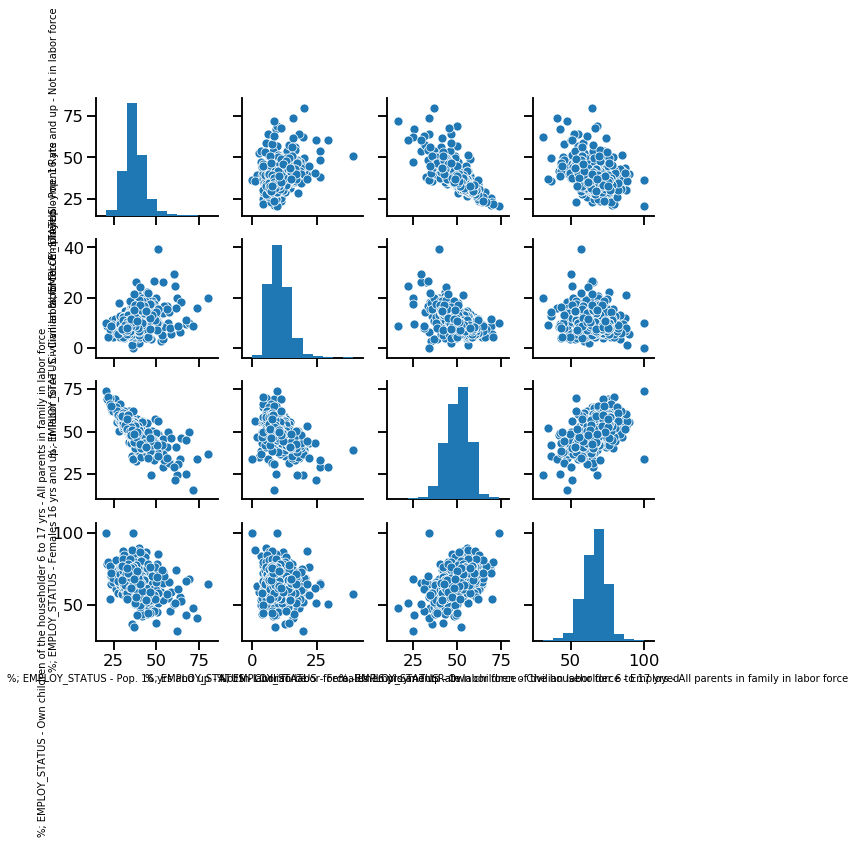

<IPython.core.display.Javascript object>

In [171]:
sns.pairplot(df_state_info_gs_census[col_census_pct_employstatus_final])

### Percentage of families below poverty line columns

In [172]:
col_census_pct_povertyline = [col for col in col_census_pct if "AGE_FAMILIES_INCOME_BELOW_POVERTY" in col]
df_state_info_gs_census[col_census_pct_povertyline].corr(method="pearson")

%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18 yrs and up  \
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18 yrs...                                           1.000000        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18-64 yrs                                           0.990275        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs...                                           0.719641        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs...                                           0.912862        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs...                                           0.794789        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All fa...                                           0.911926        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All fa...                                           0.894752        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All pe...                                           0.983803        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Marrie...                                           0.858332        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Marrie...                                           0.841118        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Under ...                                           0.878871        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Under ...                                           0.877316        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Under ...                                           0.870246        

                                                    %; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18-64 yrs  \
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18 yrs...                                           0.990275    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18-64 yrs                                           1.000000    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs...                                           0.630137    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs...                                           0.896531    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs...                                           0.791225    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All fa...                                           0.890439    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All fa...                                           0.886485    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All pe...                                           0.973040    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Marrie...                                           0.825308    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Marrie...                                           0.826554    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Under ...                                           0.865936    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Under ...                                           0.864218    
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - Under ...                                           0.852152    

                                                    %; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs and up  \
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18 yrs...                                           0.719641        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 18-64 yrs                                           0.630137        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs...                                           1.000000        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs...                                           0.698551        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - 65 yrs...                                           0.519170        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All fa...                                           0.719201        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All fa...                                           0.679474        
%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All pe...                                           0.709829        
%; %-AGE_FAMILIES_INCOME_BELOW_POVER

<IPython.core.display.Javascript object>

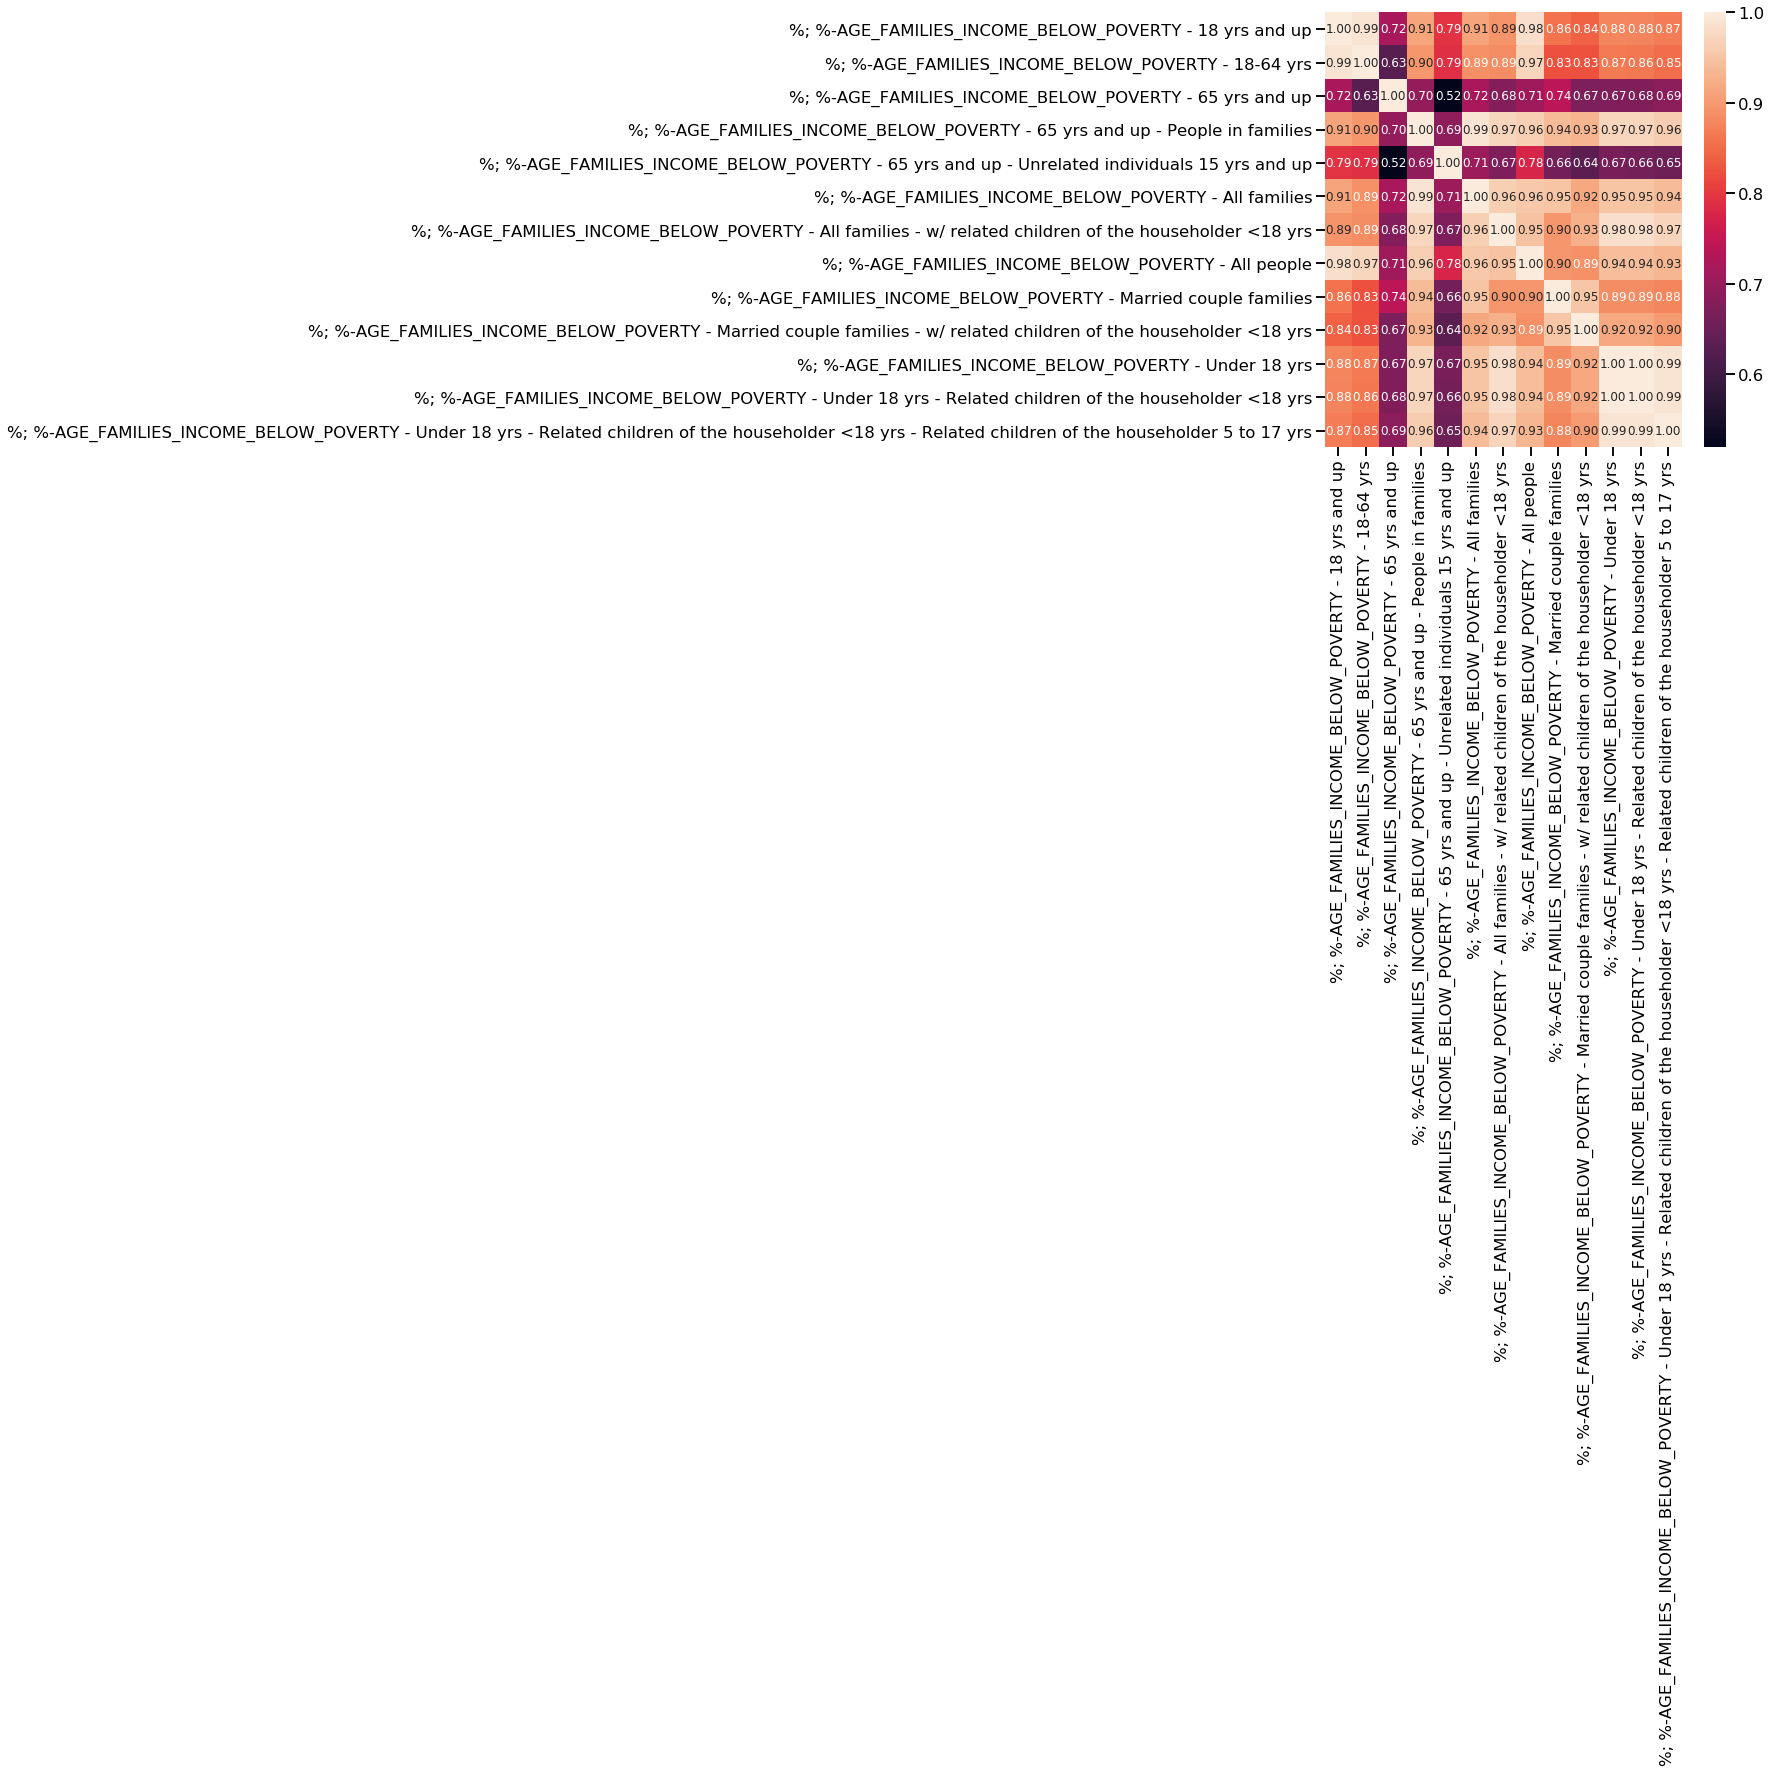

<IPython.core.display.Javascript object>

In [173]:
# Below poverty line columns
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    df_state_info_gs_census[col_census_pct_povertyline].corr(method="pearson"),
    annot=True,
    fmt="0.2f",
)

In [174]:
# Just keep this simple - pick one element that's mostly correlated with the others
col_census_pct_povertyline_final = [
    "%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All families"
]

<IPython.core.display.Javascript object>

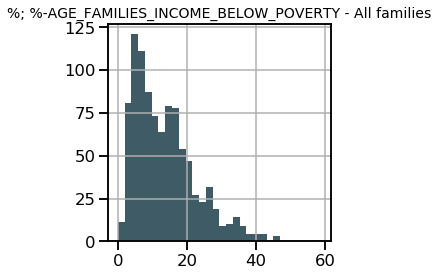

<IPython.core.display.Javascript object>

In [175]:
f, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

hist_plot(
    df_state_info_gs_census,
    "%; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All families",
    ax1,
)



### Combine final census features, check for other correlations

Before filtering:
- INCOME_BENEFITS - percentage (28 columns) - check for redundant columns and correlated and anti-correlated features
- INCOME_BENEFITS - estimated values - (12 columns) - manually select features
- HEALTH_INS_COVERAGE (17 columns) - manually select columns
- WORK_COMMUTE - adds to 100% (6 columns) - interesting to keep, but drop rare categories
- OCCUPATION - adds to 100% (5 columns) - perhaps drop - may be redundant with industry
- INDUSTRY - adds to 100% (13 columns) - interesting to keep but inspect
- WORKER_CLASS - adds to 100% (4 columns) - OK to keep but inspect
- EMPLOY_STATUS - (12 columns) - OK to keep but inspect
- %-AGE_FAMILIES_INCOME_BELOW_POVERTY (13 columns) - follow up

After filtering:
- INCOME_BENEFITS - percentage (3 columns)
- INCOME_BENEFITS - estimated values - (3 columns)
- HEALTH_INS_COVERAGE (3 columns)
- WORK_COMMUTE - (5 columns)
- OCCUPATION - (0 columns)
- INDUSTRY - (13 columns)
- WORKER_CLASS - (2 columns)
- EMPLOY_STATUS - (4 columns)
- %-AGE_FAMILIES_INCOME_BELOW_POVERTY (1 columns)

In [181]:
print(
    "\n income benefits, percentage - ",
    len(col_census_pct_ib_final),
    "\n income benefits, estimated - ",
    len(col_census_est_ib_final),
    "\n health insurance - ",
    len(col_census_pct_hi_final),
    "\n work commute - ",
    len(col_census_pct_wc_final),
    "\n industry - ",
    len(col_census_pct_industry_final),
    "\n worker class - ",
    len(col_census_pct_workerclass_final),
    "\n employment status - ",
    len(col_census_pct_employstatus_final),
    "\n percent below poverty line - ",
    len(col_census_pct_povertyline_final),
)


 income benefits, percentage -  3 
 income benefits, estimated -  3 
 health insurance -  3 
 work commute -  5 
 industry -  13 
 worker class -  2 
 employment status -  4 
 percent below poverty line -  1


<IPython.core.display.Javascript object>

In [182]:
census_col_final = (
    col_census_pct_ib_final
    + col_census_est_ib_final
    + col_census_pct_hi_final
    + col_census_pct_wc_final
    + col_census_pct_industry_final
    + col_census_pct_workerclass_final
    + col_census_pct_employstatus_final
    + col_census_pct_povertyline_final
)

<IPython.core.display.Javascript object>

In [183]:
col_census_pct_wc_final

['%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- drove alone',
 '%; WORK_COMMUTE - Workers 16 yrs and up - Car, truck, or van -- carpooled',
 '%; WORK_COMMUTE - Workers 16 yrs and up - Public transportation (excluding taxicab)',
 '%; WORK_COMMUTE - Workers 16 yrs and up - Walked',
 '%; WORK_COMMUTE - Workers 16 yrs and up - Worked at home']

<IPython.core.display.Javascript object>

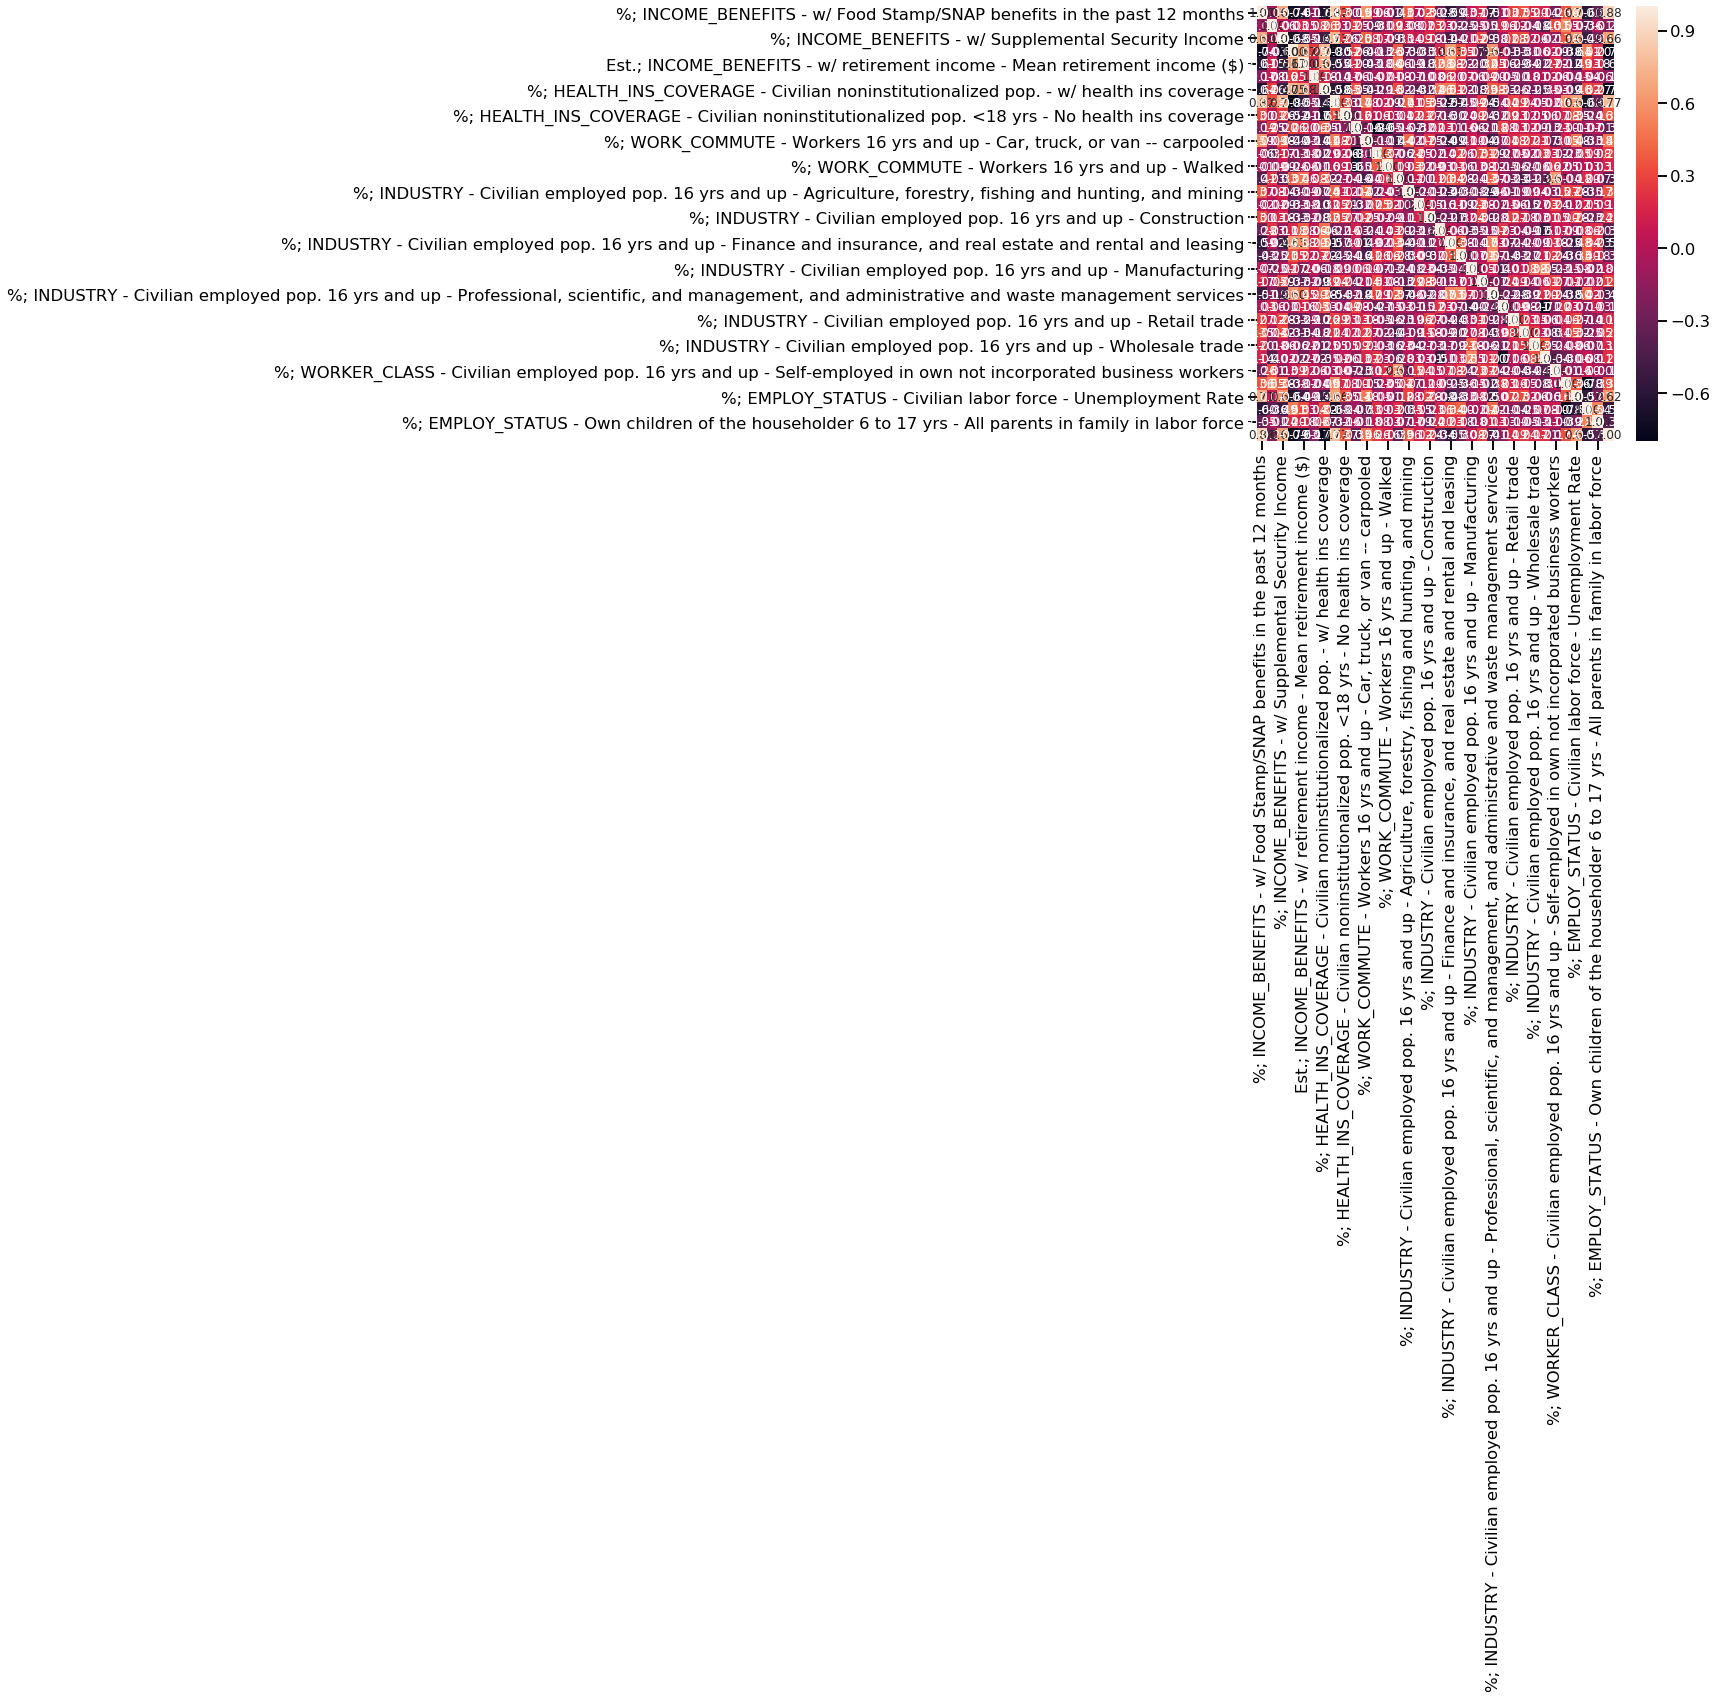

<IPython.core.display.Javascript object>

In [184]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    df_state_info_gs_census[census_col_final].corr(method="pearson"),
    annot=True,
    fmt="0.2f",
)

In [185]:
df_state_info_gs_census[census_col_final].corr(method="pearson")

%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefits in the past 12 months  \
%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefit...                                           1.000000                        
%; INCOME_BENEFITS - w/ Social Security                                                     -0.093784                        
%; INCOME_BENEFITS - w/ Supplemental Security I...                                           0.682967                        
Est.; INCOME_BENEFITS - Total households - Medi...                                          -0.739627                        
Est.; INCOME_BENEFITS - w/ retirement income - ...                                          -0.613293                        
Est.; INCOME_BENEFITS - w/ cash public assistan...                                          -0.172544                        
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                          -0.638951                        
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                           0.818186                        
%; HEALTH_INS_COVERAGE - Civilian noninstitutio...                                           0.304973                        
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                          -0.186951                        
%; WORK_COMMUTE - Workers 16 yrs and up - Car, ...                                           0.586075                        
%; WORK_COMMUTE - Workers 16 yrs and up - Publi...                                           0.064818                        
%; WORK_COMMUTE - Workers 16 yrs and up - Walked                                             0.010407                        
%; WORK_COMMUTE - Workers 16 yrs and up - Worke...                                          -0.411648                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.373330                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.017208                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.302514                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.279712                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.586322                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.433918                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.071346                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.173881                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.511185                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                          -0.034324                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.269462                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.347970                        
%; INDUSTRY - Civilian employed pop. 16 yrs and...                                           0.203296                        
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                           0.144614                        
%; WORKER_CLASS - Civilian employed pop. 16 yrs...                                          -0.260734                        
%; EMPLOY_STATUS - Pop. 16 yrs and up - Not in ...                                           0.360213                        
%; EMPLOY_STATUS - Civilian labor force - Unemp...                                           0.713334                        
%; EMPLOY_STATUS - F

<IPython.core.display.Javascript object>

In [186]:
print("No. of census features ", len(census_col_final))

No. of census features  34


<IPython.core.display.Javascript object>

In [187]:
df_state_info_gs_census[census_col_final[0:2]].corr(method="pearson")

%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefits in the past 12 months  \
%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefit...                                           1.000000                        
%; INCOME_BENEFITS - w/ Social Security                                                     -0.093784                        

                                                    %; INCOME_BENEFITS - w/ Social Security  
%; INCOME_BENEFITS - w/ Food Stamp/SNAP benefit...                                -0.093784  
%; INCOME_BENEFITS - w/ Social Security                                            1.000000

<IPython.core.display.Javascript object>

In [188]:
def melt_corr_df(df_corr):
    df = df_corr.where(np.triu(np.ones(df_corr.shape)).astype(np.bool))
    df = df.stack().reset_index()
    df.columns = ["Row", "Column", "Pearson r"]

    # Remove self-correlated Pearson r
    df = df[df["Pearson r"] != 1].copy()

    return df

<IPython.core.display.Javascript object>

In [189]:
df_corr_melted_census = melt_corr_df(
    df_state_info_gs_census[census_col_final].corr(method="pearson")
)

<IPython.core.display.Javascript object>

In [190]:
df_corr_melted_census.sort_values(by="Pearson r", ascending=False).head(10)

Row  \
33   %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
7    %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
243  %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
102  Est.; INCOME_BENEFITS - Total households - Med...   
72   %; INCOME_BENEFITS - w/ Supplemental Security ...   
30   %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
2    %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
132  Est.; INCOME_BENEFITS - w/ retirement income -...   
100  Est.; INCOME_BENEFITS - Total households - Med...   
240  %; HEALTH_INS_COVERAGE - Civilian noninstituti...   

                                                Column  Pearson r  
33   %; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All f...   0.875569  
7    %; HEALTH_INS_COVERAGE - Civilian noninstituti...   0.818186  
243  %; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All f...   0.769088  
102  %; HEALTH_INS_COVERAGE - Civilian noninstituti...   0.751227  
72   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   0.727609  
30   %; EMPLOY_STATUS - Civilian labor force - Unem...   0.713334  
2    %; INCOME_BENEFITS - w/ Supplemental Security ...   0.682967  
132  %; HEALTH_INS_COVERAGE - Civilian noninstituti...   0.677078  
100  Est.; INCOME_BENEFITS - w/ retirement income -...   0.666926  
240  %; EMPLOY_STATUS - Civilian labor force - Unem...   0.657496

<IPython.core.display.Javascript object>

In [191]:
df_corr_melted_census.sort_values(by="Pearson r", ascending=False).tail(10)

Row  \
191  %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
241  %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
68   %; INCOME_BENEFITS - w/ Supplemental Security ...   
533  %; INDUSTRY - Civilian employed pop. 16 yrs an...   
3    %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
216  %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
582  %; EMPLOY_STATUS - Pop. 16 yrs and up - Not in...   
129  Est.; INCOME_BENEFITS - Total households - Med...   
272  %; WORK_COMMUTE - Workers 16 yrs and up - Car,...   
103  Est.; INCOME_BENEFITS - Total households - Med...   

                                                Column  Pearson r  
191  %; HEALTH_INS_COVERAGE - Civilian noninstituti...  -0.653922  
241  %; EMPLOY_STATUS - Females 16 yrs and up - In ...  -0.677727  
68   Est.; INCOME_BENEFITS - Total households - Med...  -0.681637  
533  %; WORKER_CLASS - Civilian employed pop. 16 yr...  -0.712655  
3    Est.; INCOME_BENEFITS - Total households - Med...  -0.739627  
216  %; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All f...  -0.758860  
582  %; EMPLOY_STATUS - Females 16 yrs and up - In ...  -0.784276  
129  %; %-AGE_FAMILIES_INCOME_BELOW_POVERTY - All f...  -0.789473  
272  %; WORK_COMMUTE - Workers 16 yrs and up - Publ...  -0.796416  
103  %; HEALTH_INS_COVERAGE - Civilian noninstituti...  -0.799775

<IPython.core.display.Javascript object>

In [192]:
# I'll drop the poverty line element since it correlates with % of families with food stamps and it's not actionable
census_col_final_filt = (
    col_census_pct_ib_final
    + col_census_est_ib_final
    + col_census_pct_hi_final
    + col_census_pct_wc_final
    + col_census_pct_industry_final
    + col_census_pct_workerclass_final
    + col_census_pct_employstatus_final
)

<IPython.core.display.Javascript object>

In [193]:
len(census_col_final_filt)

33

<IPython.core.display.Javascript object>

### Update features - focus on actionable features

4/4/20: added enrollment (school size)

In [194]:
all_features_filt_wcensuscheck = census_col_final_filt + [
    "enrollment",
    "pct_LI_students",
    "Magnet_cat_encoded",
    "Charter_cat_encoded",
    "college_readiness",
    "students_per_teacher",
    "students_per_counselor",
    "pct_teachers_3years_or_more",
    "pct_teachers_who_r_certified",
    "avg_teacher_salary",
    "test_score_rating_LIstudents",
    "test_score_rating_notLIstudents",
    "test_scores_english_LIstudents",
    "test_scores_math_LIstudents",
    "test_scores_math_LIstudents_n_students",
    "graduation_rates_gradRates_eligibility_allStudents",
    "graduation_rates_gradRates_eligibility_LIstudents",
    "graduation_rates_UCCSU_eligibility_allStudents",
    "graduation_rates_UCCSU_eligibility_LIstudents",
    "graduation_rates_UCCSU_eligibility_nonLIstudents",
]

<IPython.core.display.Javascript object>

In [195]:
len(all_features_filt_wcensuscheck)

53

<IPython.core.display.Javascript object>

In [198]:
df_state_info_gs_census_corr = melt_corr_df(
    df_state_info_gs_census[all_features_filt_wcensuscheck].corr(method="pearson")
)

<IPython.core.display.Javascript object>

In [199]:
df_state_info_gs_census_corr.sort_values(by="Pearson r", ascending=False).head(20)

Row  \
1417  graduation_rates_gradRates_eligibility_allStud...   
1427     graduation_rates_UCCSU_eligibility_allStudents   
1426     graduation_rates_UCCSU_eligibility_allStudents   
1378                       test_score_rating_LIstudents   
1379                       test_score_rating_LIstudents   
1429      graduation_rates_UCCSU_eligibility_LIstudents   
7     %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
1302                                  college_readiness   
1377                       test_score_rating_LIstudents   
159   Est.; INCOME_BENEFITS - Total households - Med...   
1396                     test_scores_english_LIstudents   
110   %; INCOME_BENEFITS - w/ Supplemental Security ...   
30    %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
1388                    test_score_rating_notLIstudents   
1387                    test_score_rating_notLIstudents   
2     %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
208   Est.; INCOME_BENEFITS - w/ retirement income -...   
1235                                         enrollment   
157   Est.; INCOME_BENEFITS - Total households - Med...   
34    %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   

                                                 Column  Pearson r  
1417  graduation_rates_gradRates_eligibility_LIstudents   0.971163  
1427   graduation_rates_UCCSU_eligibility_nonLIstudents   0.954667  
1426      graduation_rates_UCCSU_eligibility_LIstudents   0.918722  
1378                     test_scores_english_LIstudents   0.917931  
1379                        test_scores_math_LIstudents   0.904909  
1429   graduation_rates_UCCSU_eligibility_nonLIstudents   0.833248  
7     %; HEALTH_INS_COVERAGE - Civilian noninstituti...   0.818186  
1302                    test_score_rating_notLIstudents   0.788699  
1377                    test_score_rating_notLIstudents   0.752113  
159   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   0.751227  
1396                        test_scores_math_LIstudents   0.748112  
110   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   0.727609  
30    %; EMPLOY_STATUS - Civilian labor force - Unem...   0.713334  
1388                        test_scores_math_LIstudents   0.692196  
1387                     test_scores_english_LIstudents   0.689568  
2     %; INCOME_BENEFITS - w/ Supplemental Security ...   0.682967  
208   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   0.677078  
1235             test_scores_math_LIstudents_n_students   0.671801  
157   Est.; INCOME_BENEFITS - w/ retirement income -...   0.666926  
34                                      pct_LI_students   0.663208

<IPython.core.display.Javascript object>

In [200]:
df_state_info_gs_census_corr.sort_values(by="Pearson r", ascending=False).tail(20)

Row  \
18    %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
37    %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
31    %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
4     %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
236   Est.; INCOME_BENEFITS - w/ retirement income -...   
6     %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
183   Est.; INCOME_BENEFITS - Total households - Med...   
444   %; WORK_COMMUTE - Workers 16 yrs and up - Car,...   
305   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
1251                                    pct_LI_students   
374   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
106   %; INCOME_BENEFITS - w/ Supplemental Security ...   
970   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
187   Est.; INCOME_BENEFITS - Total households - Med...   
331   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
3     %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
1133  %; EMPLOY_STATUS - Pop. 16 yrs and up - Not in...   
443   %; WORK_COMMUTE - Workers 16 yrs and up - Car,...   
160   Est.; INCOME_BENEFITS - Total households - Med...   
1244                                    pct_LI_students   

                                                 Column  Pearson r  
18    %; INDUSTRY - Civilian employed pop. 16 yrs an...  -0.586322  
37                                    college_readiness  -0.597248  
31    %; EMPLOY_STATUS - Females 16 yrs and up - In ...  -0.599515  
4     Est.; INCOME_BENEFITS - w/ retirement income -...  -0.613293  
236                                     pct_LI_students  -0.613904  
6     %; HEALTH_INS_COVERAGE - Civilian noninstituti...  -0.638951  
183   %; EMPLOY_STATUS - Civilian labor force - Unem...  -0.643201  
444    %; WORK_COMMUTE - Workers 16 yrs and up - Walked  -0.648986  
305   %; HEALTH_INS_COVERAGE - Civilian noninstituti...  -0.653922  
1251                    test_score_rating_notLIstudents  -0.666890  
374   %; EMPLOY_STATUS - Females 16 yrs and up - In ...  -0.677727  
106   Est.; INCOME_BENEFITS - Total households - Med...  -0.681637  
970   %; WORKER_CLASS - Civilian employed pop. 16 yr...  -0.712655  
187                                     pct_LI_students  -0.720845  
331                                     pct_LI_students  -0.735296  
3     Est.; INCOME_BENEFITS - Total households - Med...  -0.739627  
1133  %; EMPLOY_STATUS - Females 16 yrs and up - In ...  -0.784276  
443   %; WORK_COMMUTE - Workers 16 yrs and up - Publ...  -0.796416  
160   %; HEALTH_INS_COVERAGE - Civilian noninstituti...  -0.799775  
1244                                  college_readiness  -0.824158

<IPython.core.display.Javascript object>

In [201]:
# Look at what correlated best with the target

bool_target = df_state_info_gs_census_corr["Row"].str.contains(
    "graduation_rates_UCCSU_eligibility_LIstudents"
) | df_state_info_gs_census_corr["Column"].str.contains(
    "graduation_rates_UCCSU_eligibility_LIstudents"
)

df_state_info_gs_census_corr_target = (
    df_state_info_gs_census_corr.loc[bool_target, :]
    .sort_values(by="Pearson r", ascending=False)
    .copy()
)

<IPython.core.display.Javascript object>

In [202]:
df_state_info_gs_census_corr_target

Row  \
1426     graduation_rates_UCCSU_eligibility_allStudents   
1429      graduation_rates_UCCSU_eligibility_LIstudents   
1293                                Charter_cat_encoded   
568   %; WORK_COMMUTE - Workers 16 yrs and up - Publ...   
1401                     test_scores_english_LIstudents   
1384                       test_score_rating_LIstudents   
1408                        test_scores_math_LIstudents   
964   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
868   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
1104  %; WORKER_CLASS - Civilian employed pop. 16 yr...   
1198  %; EMPLOY_STATUS - Females 16 yrs and up - In ...   
901   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
933   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
1258                                    pct_LI_students   
726   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
609    %; WORK_COMMUTE - Workers 16 yrs and up - Walked   
1219  %; EMPLOY_STATUS - Own children of the househo...   
1423  graduation_rates_gradRates_eligibility_LIstudents   
1393                    test_score_rating_notLIstudents   
1078  %; INDUSTRY - Civilian employed pop. 16 yrs an...   
834   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
1309                                  college_readiness   
1276                                 Magnet_cat_encoded   
1419  graduation_rates_gradRates_eligibility_allStud...   
1129  %; WORKER_CLASS - Civilian employed pop. 16 yr...   
204   Est.; INCOME_BENEFITS - Total households - Med...   
301   Est.; INCOME_BENEFITS - w/ cash public assista...   
649   %; WORK_COMMUTE - Workers 16 yrs and up - Work...   
154   %; INCOME_BENEFITS - w/ Supplemental Security ...   
1324                               students_per_teacher   
439   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
1051  %; INDUSTRY - Civilian employed pop. 16 yrs an...   
51    %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...   
253   Est.; INCOME_BENEFITS - w/ retirement income -...   
799   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
526   %; WORK_COMMUTE - Workers 16 yrs and up - Car,...   
763   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
1374                                 avg_teacher_salary   
1023  %; INDUSTRY - Civilian employed pop. 16 yrs an...   
1176  %; EMPLOY_STATUS - Civilian labor force - Unem...   
1363                       pct_teachers_who_r_certified   
1239                                         enrollment   
1338                             students_per_counselor   
1414             test_scores_math_LIstudents_n_students   
394   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
348   %; HEALTH_INS_COVERAGE - Civilian noninstituti...   
1351                        pct_teachers_3years_or_more   
688   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
994   %; INDUSTRY - Civilian employed pop. 16 yrs an...   
1153  %; EMPLOY_STATUS - Pop. 16 yrs and up - Not in...   
483   %; WORK_COMMUTE - Workers 16 yrs and up - Car,...   
103             %; INCOME_BENEFITS - w/ Social Security   

                                                Column  Pearson r  
1426     graduation_rates_UCCSU_eligibility_LIstudents   0.918722  
1429  graduation_rates_UCCSU_eligibility_nonLIstudents   0.833248  
1293     graduation_rates_UCCSU_eligibility_LIstudents   0.544137  
568      graduation_rates_UCCSU_eligibility_LIstudents   0.390279  
1401     graduation_rates_UCCSU_eligibility_LIstudents   0.367764  
1384     graduation_rates_UCCSU_eligibility_LIstudents   0.355619  
1408     graduation_rates_UCCSU_eligibility_LIstudents   0.340078  
964      graduation_rates_UCCSU_eligibility_LIstudents   0.261976  
868      graduation_rates_UCCSU_eligibility_LIstudents   0.237757  
1104     graduation_rates_UCCSU_eligibility_LIstudents   0.237368  
1198     graduation_rates_UCCSU_eligibility_LIstudents   0.194023  
901      graduation_rates_UCCSU_eligibility_LIstudents   0.144249  
933      graduation_rates_UCCSU_eligibil

<IPython.core.display.Javascript object>

## Determine VIF on manually selected features

In [204]:
all_features_filt_wcensuscheck_notarget = all_features_filt_wcensuscheck[:]
all_features_filt_wcensuscheck_notarget.remove('graduation_rates_UCCSU_eligibility_LIstudents')

X_raw = df_state_info_gs_census[all_features_filt_wcensuscheck_notarget]
y_raw = df_state_info_gs_census['graduation_rates_UCCSU_eligibility_LIstudents']

<IPython.core.display.Javascript object>

In [207]:
X_filt, y_filt = filter_and_std_data(X_raw, y_raw)

No. of total schools before splitting (no null values for feature set or target):  814


<IPython.core.display.Javascript object>

In [208]:
# multiregression
X_filt_1 = sm.add_constant(X_filt)
lm = sm.OLS(endog=y_filt, exog=X_filt_1).fit()
variables = lm.model.exog

<IPython.core.display.Javascript object>

In [209]:
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

<IPython.core.display.Javascript object>

In [210]:
features_vif_vals = zip(X_raw.columns.tolist(), vif)
df_vif = pd.DataFrame(features_vif_vals)
df_vif

0            1
0   %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...     1.000000
1             %; INCOME_BENEFITS - w/ Social Security     9.721186
2   %; INCOME_BENEFITS - w/ Supplemental Security ...     5.191996
3   Est.; INCOME_BENEFITS - Total households - Med...     3.492442
4   Est.; INCOME_BENEFITS - w/ retirement income -...    10.551388
5   Est.; INCOME_BENEFITS - w/ cash public assista...     2.876661
6   %; HEALTH_INS_COVERAGE - Civilian noninstituti...     1.200801
7   %; HEALTH_INS_COVERAGE - Civilian noninstituti...    12.189268
8   %; HEALTH_INS_COVERAGE - Civilian noninstituti...    17.990864
9   %; WORK_COMMUTE - Workers 16 yrs and up - Car,...     2.865274
10  %; WORK_COMMUTE - Workers 16 yrs and up - Car,...    24.776121
11  %; WORK_COMMUTE - Workers 16 yrs and up - Publ...     6.764464
12   %; WORK_COMMUTE - Workers 16 yrs and up - Walked    15.141111
13  %; WORK_COMMUTE - Workers 16 yrs and up - Work...     4.738364
14  %; INDUSTRY - Civilian employed pop. 16 yrs an...     5.362164
15  %; INDUSTRY - Civilian employed pop. 16 yrs an...  6121.174086
16  %; INDUSTRY - Civilian employed pop. 16 yrs an...  1378.341265
17  %; INDUSTRY - Civilian employed pop. 16 yrs an...   623.593587
18  %; INDUSTRY - Civilian employed pop. 16 yrs an...  2122.915660
19  %; INDUSTRY - Civilian employed pop. 16 yrs an...   707.930409
20  %; INDUSTRY - Civilian employed pop. 16 yrs an...   384.712216
21  %; INDUSTRY - Civilian employed pop. 16 yrs an...  2097.526815
22  %; INDUSTRY - Civilian employed pop. 16 yrs an...   282.275747
23  %; INDUSTRY - Civilian employed pop. 16 yrs an...  2153.558223
24  %; INDUSTRY - Civilian employed pop. 16 yrs an...  1154.067494
25  %; INDUSTRY - Civilian employed pop. 16 yrs an...   596.983850
26  %; INDUSTRY - Civilian employed pop. 16 yrs an...   537.047655
27  %; WORKER_CLASS - Civilian employed pop. 16 yr...   213.279758
28  %; WORKER_CLASS - Civilian employed pop. 16 yr...    12.137736
29  %; EMPLOY_STATUS - Pop. 16 yrs and up - Not in...     6.178359
30  %; EMPLOY_STATUS - Civilian labor force - Unem...     4.654342
31  %; EMPLOY_STATUS - Females 16 yrs and up - In ...     3.624190
32  %; EMPLOY_STATUS - Own children of the househo...     6.752441
33                                         enrollment     2.131316
34                                    pct_LI_students     7.290354
35                                 Magnet_cat_encoded    10.124297
36                                Charter_cat_encoded     1.173797
37                                  college_readiness     1.732258
38                               students_per_teacher     8.564168
39                             students_per_counselor     2.048585
40                        pct_teachers_3years_or_more     1.320379
41                       pct_teachers_who_r_certified     1.291225
42                                 avg_teacher_salary     1.377861
43                       test_score_rating_LIstudents     1.515033
44                    test_score_rating_notLIstudents    24.995461
45                     test_scores_english_LIstudents     5.173664
46                        test_scores_math_LIstudents    10.502556
47             test_scores_math_LIstudents_n_students     8.782649
48  graduation_rates_gradRates_eligibility_allStud...     8.456019
49  graduation_rates_gradRates_eligibility_LIstudents    12.253086
50     graduation_rates_UCCSU_eligibility_allStudents     8.895379
51   graduation_rates_UCCSU_eligibility_nonLIstudents    17.180847

<IPython.core.display.Javascript object>

In [211]:
df_vif[df_vif[1] < 10]

0         1
0   %; INCOME_BENEFITS - w/ Food Stamp/SNAP benefi...  1.000000
1             %; INCOME_BENEFITS - w/ Social Security  9.721186
2   %; INCOME_BENEFITS - w/ Supplemental Security ...  5.191996
3   Est.; INCOME_BENEFITS - Total households - Med...  3.492442
5   Est.; INCOME_BENEFITS - w/ cash public assista...  2.876661
6   %; HEALTH_INS_COVERAGE - Civilian noninstituti...  1.200801
9   %; WORK_COMMUTE - Workers 16 yrs and up - Car,...  2.865274
11  %; WORK_COMMUTE - Workers 16 yrs and up - Publ...  6.764464
13  %; WORK_COMMUTE - Workers 16 yrs and up - Work...  4.738364
14  %; INDUSTRY - Civilian employed pop. 16 yrs an...  5.362164
29  %; EMPLOY_STATUS - Pop. 16 yrs and up - Not in...  6.178359
30  %; EMPLOY_STATUS - Civilian labor force - Unem...  4.654342
31  %; EMPLOY_STATUS - Females 16 yrs and up - In ...  3.624190
32  %; EMPLOY_STATUS - Own children of the househo...  6.752441
33                                         enrollment  2.131316
34                                    pct_LI_students  7.290354
36                                Charter_cat_encoded  1.173797
37                                  college_readiness  1.732258
38                               students_per_teacher  8.564168
39                             students_per_counselor  2.048585
40                        pct_teachers_3years_or_more  1.320379
41                       pct_teachers_who_r_certified  1.291225
42                                 avg_teacher_salary  1.377861
43                       test_score_rating_LIstudents  1.515033
45                     test_scores_english_LIstudents  5.173664
47             test_scores_math_LIstudents_n_students  8.782649
48  graduation_rates_gradRates_eligibility_allStud...  8.456019
50     graduation_rates_UCCSU_eligibility_allStudents  8.895379

<IPython.core.display.Javascript object>

## ---